## Proyecto Integrador

##### La empresa farmacéutica BIOGENESYS busca identificar las ubicaciones óptimas para la expansión de laboratorios farmacéuticos, basándose en el análisis de datos de incidencia de COVID-19, tasas de vacunación, y la disponibilidad de infraestructuras sanitarias. La meta es optimizar la respuesta a los efectos de la pandemia y postpandemia con el fin de mejorar el acceso a las vacunas.



### **1.Avance uno: Carga y transformación de datos**


##### Importación de librerias

In [136]:
#Importamos las librerias necesarias para el proyecto
import pandas as pd                      #importamos la libreria pandas (avance 1)  
import numpy as np                       #importamos la libreria numpy  (avance 1)  
import matplotlib.pyplot as plt          #importamos la libreria Matplotlib (avance 1 y 2)  
import seaborn as sns                    #importamos la libreria Seaborn    (avance 1 y 2)  
import matplotlib.dates as mdates        #importamos la libreria Matplotlib de dates  (avance 3)
import folium                           #importamos la libreri folium (extra-credit)
from folium.plugins import HeatMap

##### Lectura del archivo data_latinoamerica.cvs en VCS

In [2]:
#Lectura del archivo, el cual al ser un CSV está separado de forma predeterminada por comas
data = pd.read_csv("data_latinoamerica.csv", sep= ',')       

##### Comprobación de la cantidad de registros y columnas especificadas del dataset (12,216,057 filas y 50 columnas) y vista de las primeras lineas del Dataframe

In [38]:
#Para ver desde numpy
np.shape (data) 

(12216057, 50)

In [100]:
#Para ver desde panda nuestro Dataframe
data.shape 

(12216057, 50)

In [4]:
#obtenemos una visualizacion de las primeros 5 lineas
data.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

##### Seleccion de los paises con los cuales se elaborará el informe

In [26]:
#Armamos una lista de paises con los cuales trabajaremos, se trata de una mascara llamada 'paises_seleccionados'
paises_seleccionados = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']   
data_latinoamerica = data[data['country_name'].isin(paises_seleccionados)]


In [6]:
#Verificamos los nulls
print(data.isnull().sum())

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5839054
new_deceased                              5893738
cumulative_confirmed                      5838685
cumulative_deceased                       5893376
cumulative_vaccine_doses_administered    11948128
population                                 532167
population_male                           1123794
population_female                         1123794
population_rural                         12196237
population_urban                         12196237
population_density                       12196237
human_development_index                   6705106
population_age_00_09                      1466680
population_age_10_19                      1466680
population_age_20_29                      1466680
population_age_30_39                      1466680


In [7]:
#verificamos la calidad de los datos de la columna location_key
data_latinoamerica.location_key.value_counts()

location_key
AR              991
MX_GRO_12040    991
MX_GRO_12031    991
MX_GRO_12032    991
MX_GRO_12033    991
               ... 
BR_PR_411880    991
BR_PR_411885    991
BR_PR_411890    991
BR_PR_411900    991
PE_UCA_0401     991
Name: count, Length: 12079, dtype: int64

In [39]:
#En este punto, se observa que el nombre de los datos se presenta escrito de distintas formas, por lo cual se decide trabajar con las abreviaciones de cada pais
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]

In [9]:
#Visualización de filas y columnas con el nuevo filtro aplicado

data_latinoamerica_paises.shape

(5946, 50)

In [10]:
#Verificamos el tipo de dato de las columnas del Dateframe
print(data.dtypes)

location_key                              object
date                                      object
country_code                              object
country_name                              object
new_confirmed                            float64
new_deceased                             float64
cumulative_confirmed                     float64
cumulative_deceased                      float64
cumulative_vaccine_doses_administered    float64
population                               float64
population_male                          float64
population_female                        float64
population_rural                         float64
population_urban                         float64
population_density                       float64
human_development_index                  float64
population_age_00_09                     float64
population_age_10_19                     float64
population_age_20_29                     float64
population_age_30_39                     float64
population_age_40_49

##### Filtrado de datos con fecha superior a 2021-01-01

In [40]:
#Filtramos por fecha mayor a 2021-01-01
data_latinoamerica_paises_fecha= data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']         

In [41]:
#Visualizamos la dimension del Dataset con los nuevos filtros
print(np.shape(data_latinoamerica_paises_fecha))

(3744, 50)


##### Tratamiento de nulls en filas y columnas

In [42]:
#Verificamos los nulls por columnas de mi Dataset
valores_nulos_fecha = data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0]
print(valores_nulos_fecha)


new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64


In [33]:
#También nos interesan saber cuales son los indices (columnas) que poseen nulos
valores_nulos_fecha.index     

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

In [43]:
#Aplicamos un ciclo For para iterar sobre las columnas que tienen nulls y completar con sus valores medios. En este caso tomamos la media de cada pais 
for pais in paises_seleccionados:
    # Filtramos las filas correspondientes al país 
    mascara_paises = data_latinoamerica_paises_fecha['country_name'] == pais
  
    # Rellenamos los nulls con los valores medios de cada columna de antes
    data_latinoamerica_paises_fecha.loc[mascara_paises, 'new_confirmed'] = data_latinoamerica_paises_fecha.loc[mascara_paises, 'new_confirmed'].fillna(data_latinoamerica_paises_fecha.loc[mascara_paises, 'new_confirmed'].mean(0))
    data_latinoamerica_paises_fecha.loc[mascara_paises, 'new_deceased'] = data_latinoamerica_paises_fecha.loc[mascara_paises, 'new_deceased'].fillna(data_latinoamerica_paises_fecha.loc[mascara_paises, 'new_deceased'].mean(0))
    data_latinoamerica_paises_fecha.loc[mascara_paises, 'cumulative_confirmed'] = data_latinoamerica_paises_fecha.loc[mascara_paises, 'cumulative_confirmed'].fillna(data_latinoamerica_paises_fecha.loc[mascara_paises, 'cumulative_confirmed'].mean(0))
    data_latinoamerica_paises_fecha.loc[mascara_paises, 'cumulative_deceased'] = data_latinoamerica_paises_fecha.loc[mascara_paises, 'cumulative_deceased'].fillna(data_latinoamerica_paises_fecha.loc[mascara_paises, 'cumulative_deceased'].mean(0))
    data_latinoamerica_paises_fecha.loc[mascara_paises, 'average_temperature_celsius'] = data_latinoamerica_paises_fecha.loc[mascara_paises, 'average_temperature_celsius'].fillna(data_latinoamerica_paises_fecha.loc[mascara_paises, 'average_temperature_celsius'].mean())
    data_latinoamerica_paises_fecha.loc[mascara_paises, 'minimum_temperature_celsius'] = data_latinoamerica_paises_fecha.loc[mascara_paises, 'minimum_temperature_celsius'].fillna(data_latinoamerica_paises_fecha.loc[mascara_paises, 'minimum_temperature_celsius'].mean())
    data_latinoamerica_paises_fecha.loc[mascara_paises, 'maximum_temperature_celsius'] = data_latinoamerica_paises_fecha.loc[mascara_paises, 'maximum_temperature_celsius'].fillna(data_latinoamerica_paises_fecha.loc[mascara_paises, 'maximum_temperature_celsius'].mean())
    data_latinoamerica_paises_fecha.loc[mascara_paises, 'rainfall_mm'] = data_latinoamerica_paises_fecha.loc[mascara_paises, 'rainfall_mm'].fillna(data_latinoamerica_paises_fecha.loc[mascara_paises, 'rainfall_mm'].mean())
    data_latinoamerica_paises_fecha.loc[mascara_paises, 'relative_humidity'] = data_latinoamerica_paises_fecha.loc[mascara_paises, 'relative_humidity'].fillna(data_latinoamerica_paises_fecha.loc[mascara_paises, 'relative_humidity'].mean())


In [44]:
#Verificamos cómo quedó una calidad de columnas luego de los reemplazos
valores_nulos_fecha = data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0]
print(valores_nulos_fecha)

cumulative_vaccine_doses_administered     584
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64


In [45]:
#En la columna 'new_recovered', reemplazamos valores negativos y nulls con cero
data_latinoamerica_paises_fecha.loc[:,'new_recovered'] = data_latinoamerica_paises_fecha['new_recovered'].clip(lower=0).fillna(0)

In [46]:
#Tomamos todas las filas de las columnas 'cumulative_recoverd' y 'cumulative_vaccine_doses_administered' para tratar sus nulls y reemplazarlos por cero.
data_latinoamerica_paises_fecha.loc[:, 'cumulative_recovered'] = data_latinoamerica_paises_fecha['cumulative_recovered'].fillna(0)
data_latinoamerica_paises_fecha.loc[:, 'cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered'].fillna(0)


In [47]:
#Verificamos nuevamente el tratamiento de los nulls y el tamaño del dataset. Vemos que ya no tenemos nulls
print(data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0])
data_latinoamerica_paises_fecha.shape

Series([], dtype: int64)


(3744, 50)

In [52]:
#Detectamos que tenemos algunas columnas con datos flotantes, las cuales deberían admitir solo datos enteros (cuando se trata de personas), por lo cual se redondea por el entero más próximo#Considerando que tenemos a disposicion el diccionario con los tipos de datos, procedemos a hacer la transformación de las columnas de tipo float hacia el tipo integrer
# Listamos las columnas que vamos a transformar
columnas_enteros=['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered','population', 'population_male','population_female','population_rural','population_urban','population_age_00_09','population_age_10_19', 'population_age_20_29','population_age_30_39','population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older','gdp_usd','gdp_per_capita_usd', 'area_sq_km','population_largest_city','area_rural_sq_km','area_urban_sq_km','new_recovered','cumulative_recovered']

# Con un ciclo for trabajamos para convertir las columnas de nuestra lista columnas_enteros a tipo integer o entero, con loc.[: nos aseguramos que trabaje sobre todas las filas de la columna]
for columna in columnas_enteros:
    data_latinoamerica_paises_fecha.loc[:,columna] = data_latinoamerica_paises_fecha[columna].astype(int)

# Imprimimos los tipos de datos después de la transformación del ciclo for
print("\nTipos de datos luego de la conversión:")
print(data_latinoamerica_paises_fecha.info())  



Tipos de datos luego de la conversión:
<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 367 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   int64  
 5   new_deceased                           3744 non-null   int64  
 6   cumulative_confirmed                   3744 non-null   int64  
 7   cumulative_deceased                    3744 non-null   int64  
 8   cumulative_vaccine_doses_administered  3744 non-null   int64  
 9   population                             3744 non-null   int64  
 10  population_male                

In [51]:
#Verificamos el cambio en las primeras 10 filas
data_latinoamerica_paises_fecha.head(10)

location_key        date country_code country_name  new_confirmed  \
367           AR  2021-01-02           AR    Argentina           7767   
368           AR  2021-01-03           AR    Argentina           4934   
369           AR  2021-01-04           AR    Argentina          13953   
370           AR  2021-01-05           AR    Argentina          14085   
371           AR  2021-01-06           AR    Argentina          14496   
372           AR  2021-01-07           AR    Argentina          13722   
373           AR  2021-01-08           AR    Argentina          13932   
374           AR  2021-01-09           AR    Argentina           9959   
375           AR  2021-01-10           AR    Argentina           5174   
376           AR  2021-01-11           AR    Argentina          13076   

     new_deceased  cumulative_confirmed  cumulative_deceased  \
367           166               1670634                46688   
368           157               1675568                46845   
369           157               1689521                47002   
370           160               1703606                47162   
371           131               1718102                47293   
372           160               1731824                47453   
373           162               1745756                47615   
374           158               1755715                47773   
375           165               1760889                47938   
376           170               1773965                48108   

     cumulative_vaccine_doses_administered  population  ...  \
367                                  20334    44938712  ...   
368                                  20529    44938712  ...   
369                                  25164    44938712  ...   
370                                  29852    44938712  ...   
371                                  34162    44938712  ...   
372                                  42092    44938712  ...   
373                                  54090    44938712  ...   
374                                  58552    44938712  ...   
375                                  59043    44938712  ...   
376                                  67496    44938712  ...   

     population_largest_city  area_rural_sq_km  area_urban_sq_km  \
367                 15057273           2690269             55032   
368                 15057273           2690269             55032   
369                 15057273           2690269             55032   
370                 15057273           2690269             55032   
371                 15057273           2690269             55032   
372                 15057273           2690269             55032   
373                 15057273           2690269             55032   
374                 15057273           2690269             55032   
375                 15057273           2690269             55032   
376                 15057273           2690269             55032   

     life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
367            76.52                    147.086                       79.483   
368            76.52                    147.086                       79.483   
369            76.52                    147.086                       79.483   
370            76.52                    147.086                       79.483   
371            76.52                    147.086                       79.483   
372            76.52                    147.086                       79.483   
373            76.52                    147.086                       79.483   
374            76.52                    147.086                       79.483   
375            76.52                    147.086                       79.483   
376            76.52                    147.086                       79.483   

     pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
367                      26.6                        15.8              0   
368                

##### Guardado del dataset en un nuevo CSV

In [53]:
#Guardamos del dataset en un nuevo CSV, el cual es de un tamaño más pequeño y facilita su exploracion
data_latinoamerica_paises_fecha.to_csv("DatosFinalesFiltrado.csv",index=False)
print("Archivo guardado exitosamente")              #Imprimimos un mensaje de confirmación

Archivo guardado exitosamente


In [54]:
#Reiniciamos VSC y leemos el nuevo dataset
data_latinoamerica_nuevo=pd.read_csv("DatosFinalesFiltrado.csv",sep=',')

##### Obtención de medidas por pais

In [55]:
#Aplicamos describe y observamos que trabaja solo para valores numericos
data_latinoamerica_nuevo.describe()

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13921.906784    276.885417          6.777074e+06        192957.900107   
std     24219.361428    507.240047          7.989269e+06        182798.790297   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59255.750000   
50%      5214.000000    100.500000          3.632144e+06        139614.000000   
75%     14834.000000    312.000000          6.223497e+06        214939.500000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            6.544474e+07  7.772147e+07     3.787035e+07   
std                             9.247680e+07  6.713776e+07     3.318494e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             2.618297e+06  2.938188e+07     1.445076e+07   
50%                             3.244576e+07  4.791080e+07     2.225416e+07   
75%                             7.478108e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8305.947382          3.894398e+06  
std                      1.665972   23

In [56]:
#Definimos la funcion describir_datos y a traves del ciclo for calculamos la mediana, varianza, rango y moda para cada columna
def describir_datos(data_latinoamerica_nuevo):
    for i in data_latinoamerica_nuevo.columns:
        if data_latinoamerica_nuevo[i].dtype == 'float64' or data_latinoamerica_nuevo[i].dtype == 'int64':
            print(i)
            print('Mediana:',data_latinoamerica_nuevo[i].median())
            print('varianza:',data_latinoamerica_nuevo[i].var())
            print('Rango', data_latinoamerica_nuevo[i].max()-data_latinoamerica_nuevo[i].min())
            print("Moda",data_latinoamerica_nuevo[i].mode())
            print('__________________________________')

describir_datos(data_latinoamerica_nuevo)

new_confirmed
Mediana: 5214.0
varianza: 586577467.9685996
Rango 298981
Moda 0    0
Name: new_confirmed, dtype: int64
__________________________________
new_deceased
Mediana: 100.5
varianza: 257292.46482600857
Rango 11447
Moda 0    0
Name: new_deceased, dtype: int64
__________________________________
cumulative_confirmed
Mediana: 3632143.5
varianza: 63828420104919.09
Rango 34567862
Moda 0     6093645
1     6095316
2     6099111
3     6103455
4     6109105
5     6117847
6     6131657
7     6151354
8     6175181
9     6198848
10    6223497
11    6247634
12    6265798
13    6278998
14    6286392
15    6293130
16    6299595
17    6302809
18    9313453
19    9341492
20    9367172
21    9394326
22    9426171
23    9465827
24    9507562
25    9560307
26    9602534
27    9633732
28    9658391
29    9678225
30    9689861
Name: cumulative_confirmed, dtype: int64
__________________________________
cumulative_deceased
Mediana: 139614.0
varianza: 33415397734.096348
Rango 685202
Moda 0     128994
1  

### **2.Avance dos: Análisis exploratorio y visualizaciones**

##### Importación de librerias 
Por buenas prácticas, todas las librerias se importan desde la primera linea. En este avance se agregaron las librerias de Matplotlit y Seaborn, a las ya utilizadas Pandas y Numpy

In [2]:
#Lectura de nuestro dataset
data_latinoamerica_nuevo=pd.read_csv("DatosFinalesFiltrado.csv",sep=',')

In [57]:
#Recordamos que filtramos por paises seleccionados
paises_seleccionados=['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']

In [58]:
#Convertimos la columna Date en tipo de dato fecha
data_latinoamerica_nuevo['date'] = pd.to_datetime(data_latinoamerica_nuevo['date'])
data_latinoamerica_nuevo.set_index('date', inplace=True)    

In [59]:
#Verificamos el cambio realizado previamente
print(data_latinoamerica_nuevo.index.dtype)

datetime64[ns]


##### Análisis Estadístico con Pandas y Numpy
##### Calculo de medidas de tendencia central, dispersión y correlaciones entre las variables para entender mejor la situación actual y las necesidades de las áreas en estudio 

In [60]:
def describir_datos(data_latinoamerica_nuevo):
    for i in data_latinoamerica_nuevo.columns:
        if data_latinoamerica_nuevo[i].dtype == 'float64' or data_latinoamerica_nuevo[i].dtype == 'int64':
            print(i)
            print('Mediana:',data_latinoamerica_nuevo[i].median())
            print('Varianza:',data_latinoamerica_nuevo[i].var())
            print('Rango', data_latinoamerica_nuevo[i].max()-data_latinoamerica_nuevo[i].min())
            print("Moda",data_latinoamerica_nuevo[i].mode())
            print('__________________________________')

describir_datos(data_latinoamerica_nuevo)

new_confirmed
Mediana: 5214.0
Varianza: 586577467.9685996
Rango 298981
Moda 0    0
Name: new_confirmed, dtype: int64
__________________________________
new_deceased
Mediana: 100.5
Varianza: 257292.46482600857
Rango 11447
Moda 0    0
Name: new_deceased, dtype: int64
__________________________________
cumulative_confirmed
Mediana: 3632143.5
Varianza: 63828420104919.09
Rango 34567862
Moda 0     6093645
1     6095316
2     6099111
3     6103455
4     6109105
5     6117847
6     6131657
7     6151354
8     6175181
9     6198848
10    6223497
11    6247634
12    6265798
13    6278998
14    6286392
15    6293130
16    6299595
17    6302809
18    9313453
19    9341492
20    9367172
21    9394326
22    9426171
23    9465827
24    9507562
25    9560307
26    9602534
27    9633732
28    9658391
29    9678225
30    9689861
Name: cumulative_confirmed, dtype: int64
__________________________________
cumulative_deceased
Mediana: 139614.0
Varianza: 33415397734.096348
Rango 685202
Moda 0     128994
1  

##### Visualizacion de datos con Matplotlib y Seaborn
##### Representación de hallazgos por cada país o de manera general a través de gráficos y/o visualizaciones

• Matriz de correlación: creación de una submascara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5.

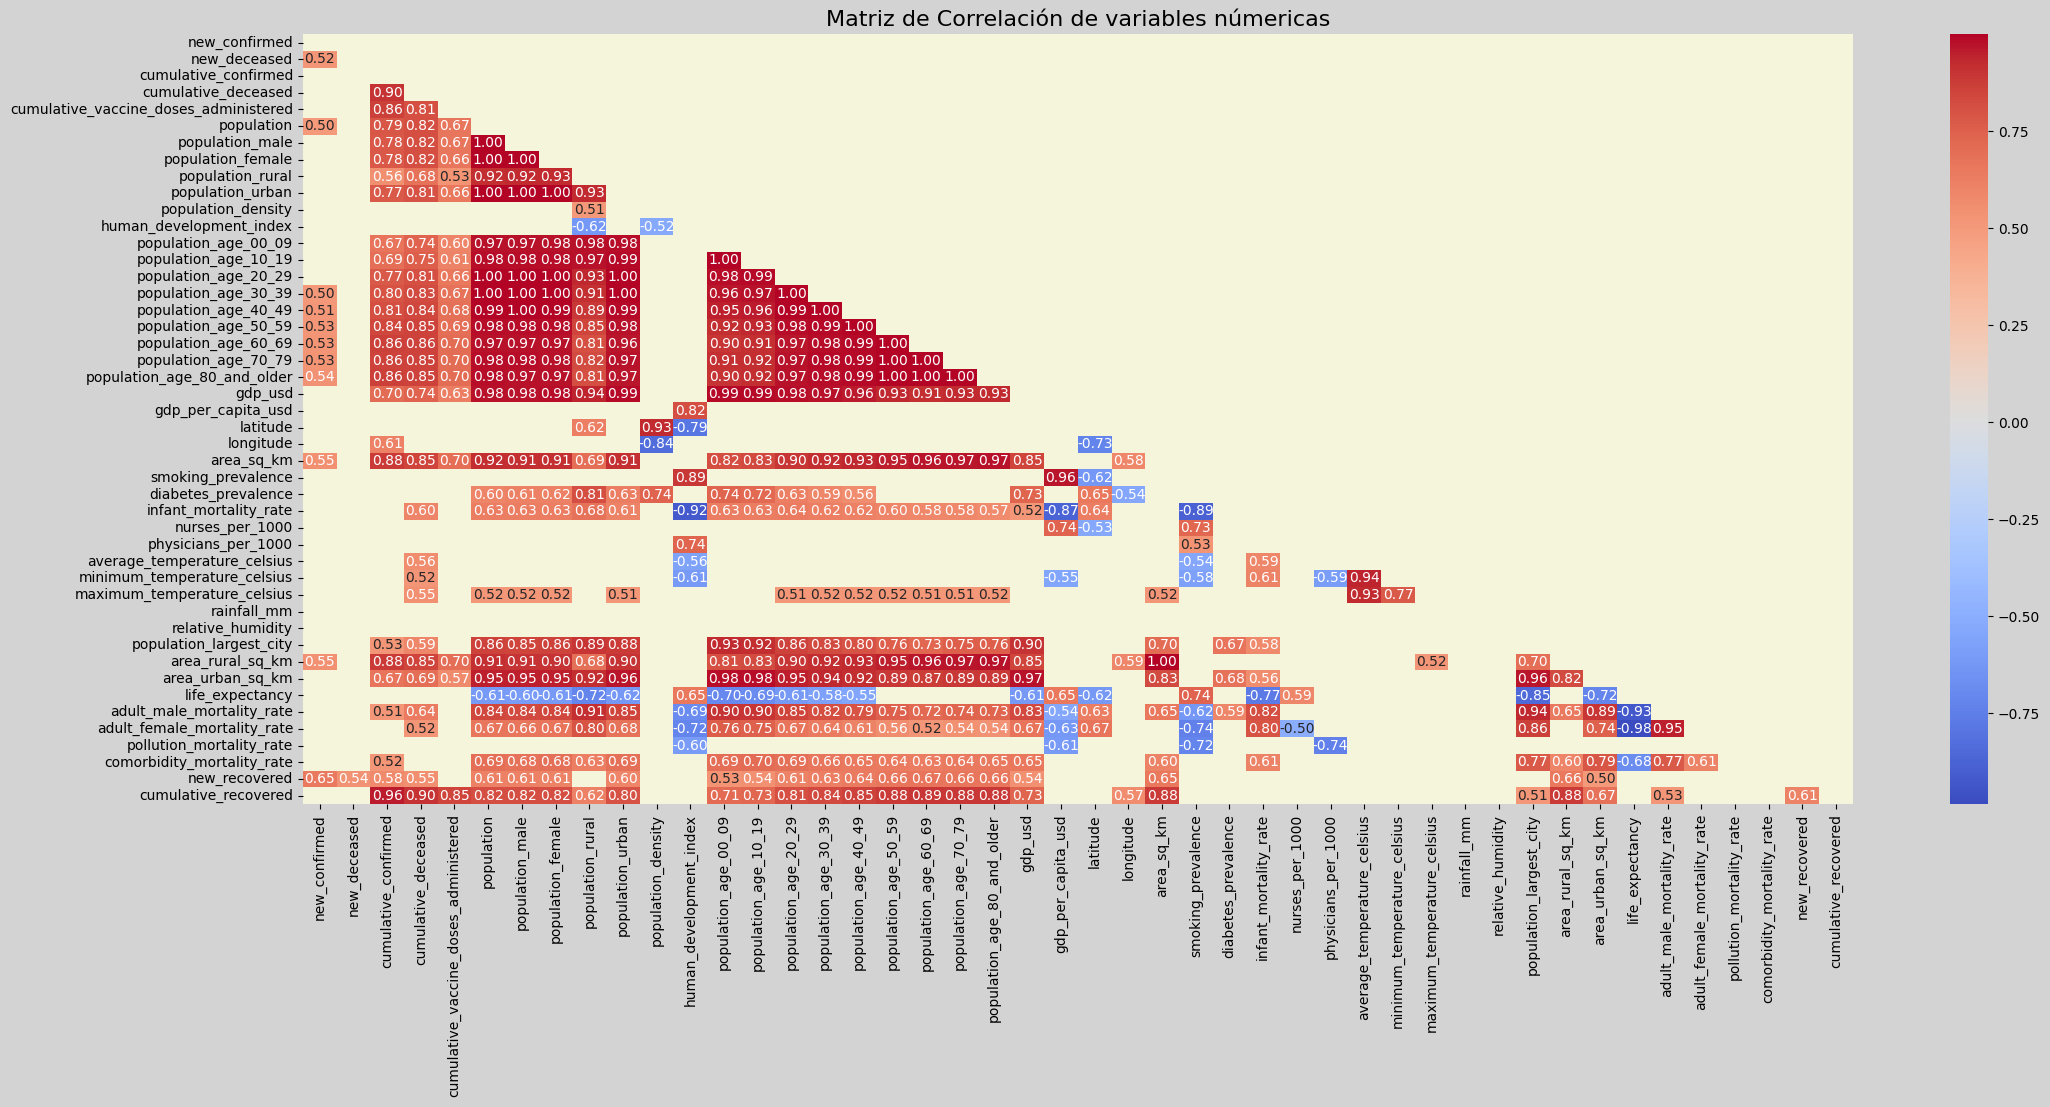

In [61]:
#Realizamos un primer acercamiento con una matriz de correlación para ver si existe alguna relación entre las variables para tener en cuenta en un análisis posterior
#Creamos la matriz de correlación de las variables numéricas

columnas_numericas= data_latinoamerica_nuevo.select_dtypes(include=['float64','int64']).columns
matriz_correlacion= data_latinoamerica_nuevo[columnas_numericas].corr()

#Creamos la mascara_correlacion para el triangulo superior
mascara_correlacion=np.triu(np.ones_like(matriz_correlacion,dtype=bool))

#Ahora mostramos los valores superiores a 0.5, es decir donde hay una correlación fuerte. Sin embargo también pueden mostrarse valores negativos
matriz_correlacion=matriz_correlacion[abs(matriz_correlacion)>abs(0.5)]

#Creamos la grafica para ver la matriz de correlacion
plt.figure(figsize=(25,10))
heatmap= sns.heatmap(matriz_correlacion, mask=mascara_correlacion, annot=True, cmap='coolwarm', fmt='.2f')  #usamos la libreria seaborn, fmt es el numero de float que me muestra 2 decimales
plt.gca().set_facecolor('beige')                # Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')            # Establecemos el fondo alrededor del gráfico 

#Añadimos un titulo 
plt.title('Matriz de Correlación de variables númericas', fontsize=16)

#Mostramos el gráfico
plt.show()                                      

#Vemos espacios en blanco, ya que buscamos correlaciones mayor a 0.5 (altas), inclusive el negativo porque es que cuando uno sube el otro baja (uso abs)(mas muertes, menos recuperados por ejemplo)
#Usando la libreria matplotlib con el submódulo pyplot para generar la figura insertando datos (solo con variables númericas)
#uso sólo la mitad para no repetir información (como un espejo, sobre la diagonal de 1)
#Variables de mayor correlacion y para identificarlas más rápido se define un umbral mayor a 0.5 absoluto, graficados en un heatmap
#Teniendo una idea de las variables con mayor correlación, puedo hacer un análisis más detallado. Podemos proceder a realizar una rápida revision grafica de la gran mayoría de las columnas para ver como se comportan los datos


- Gráficos de barras de países contra el resto de variables.

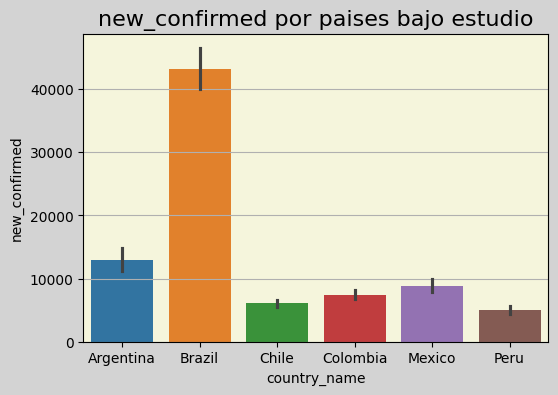

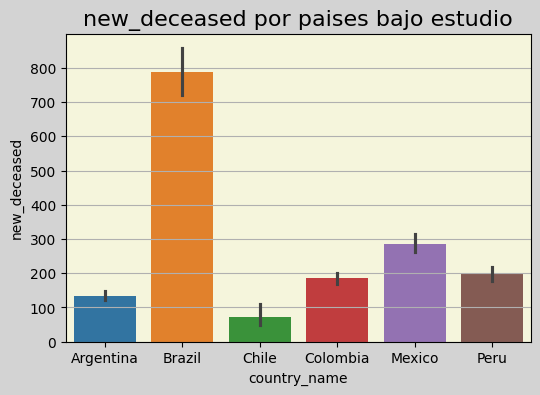

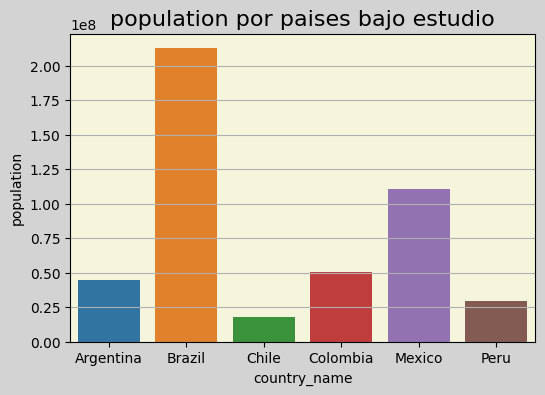

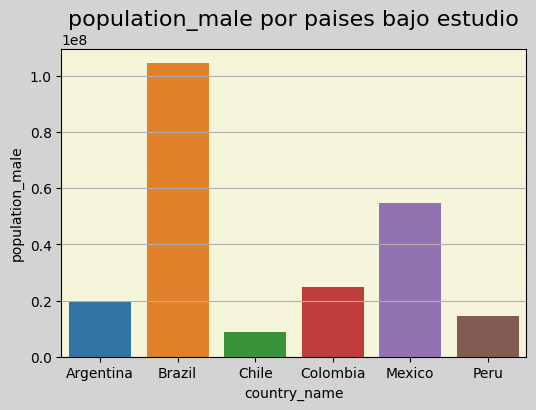

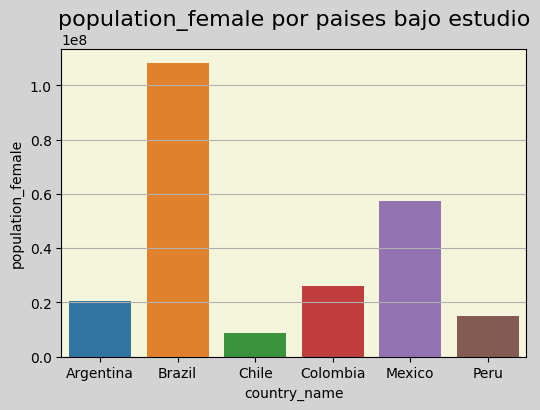

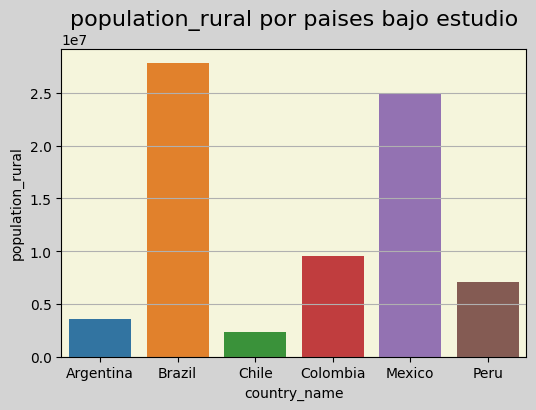

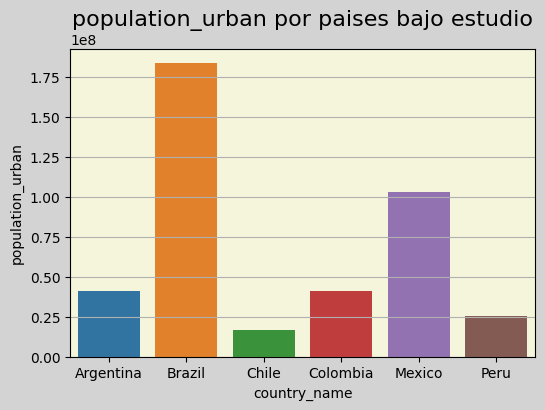

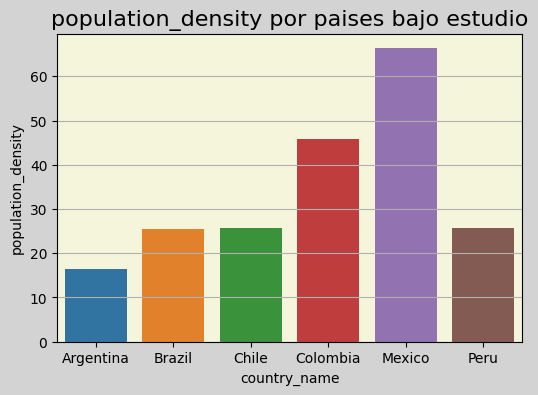

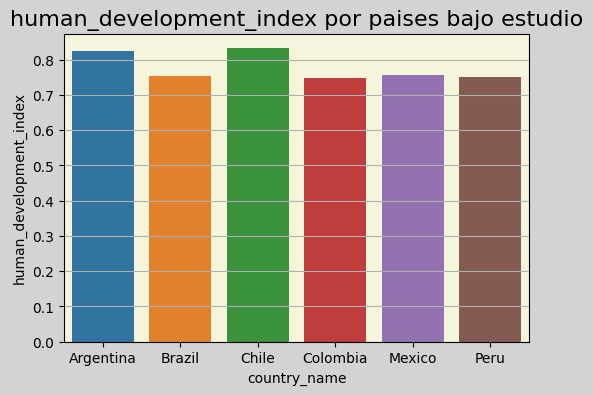

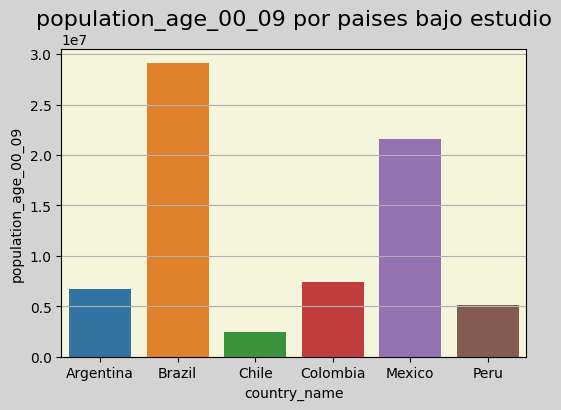

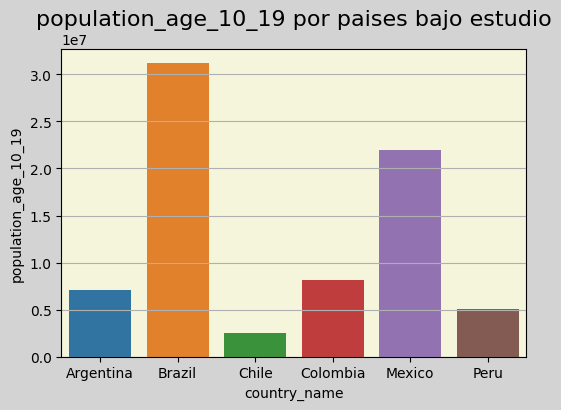

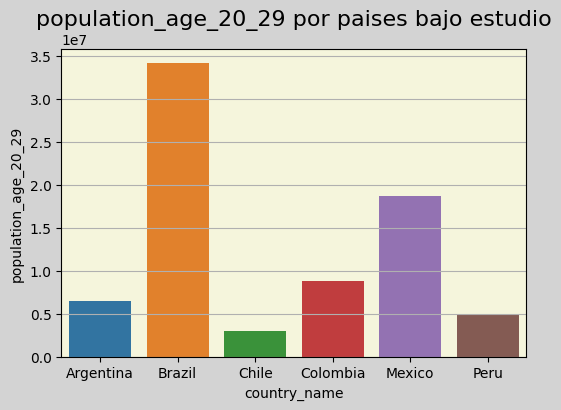

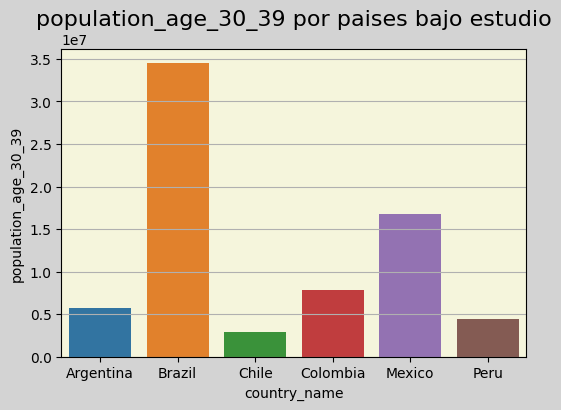

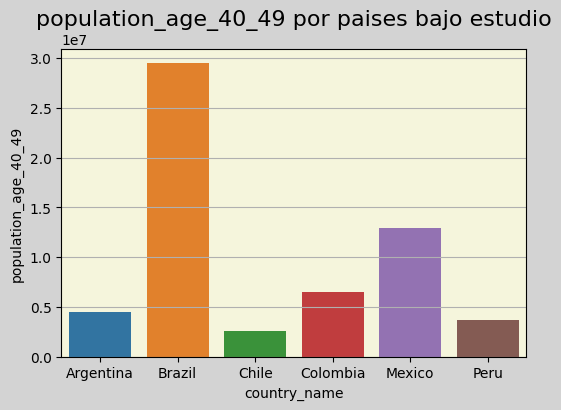

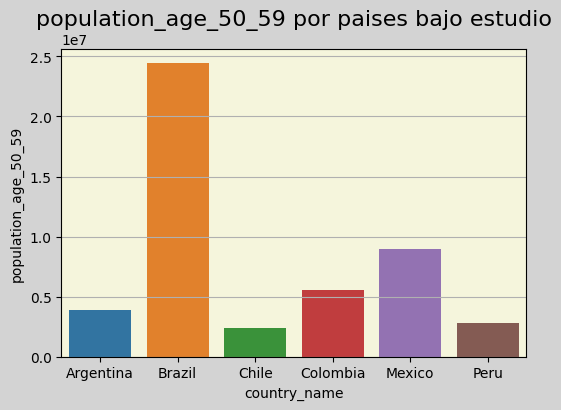

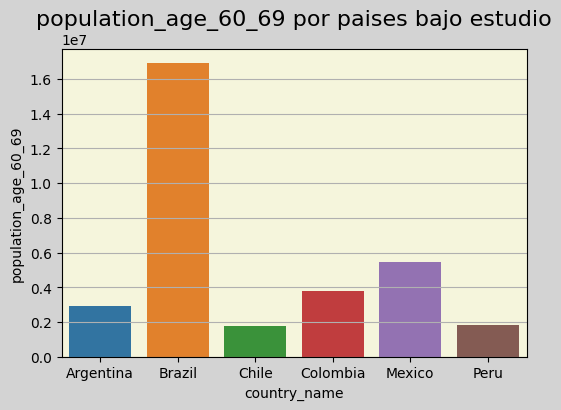

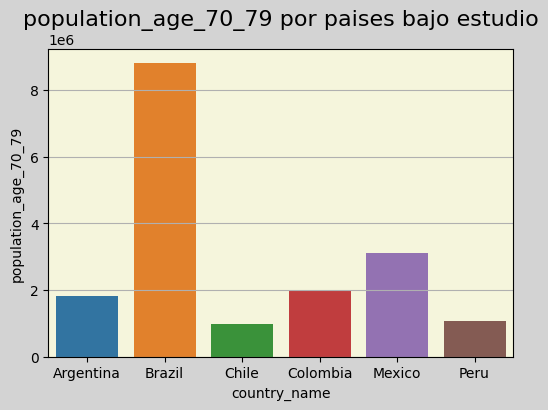

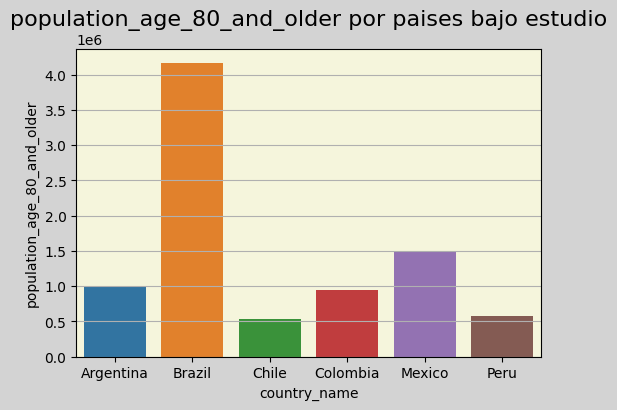

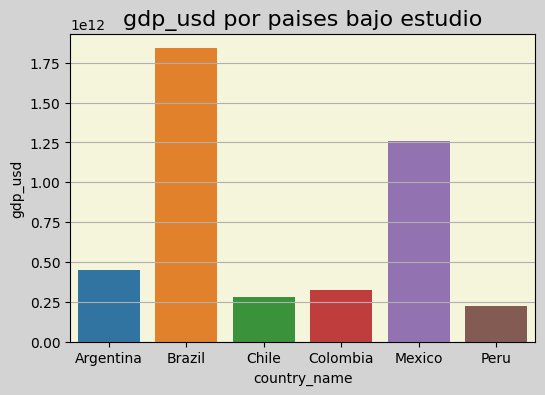

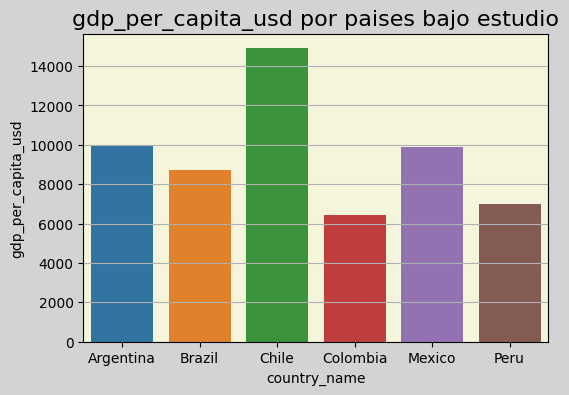

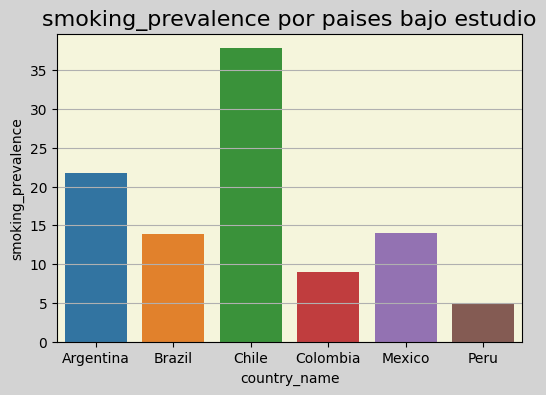

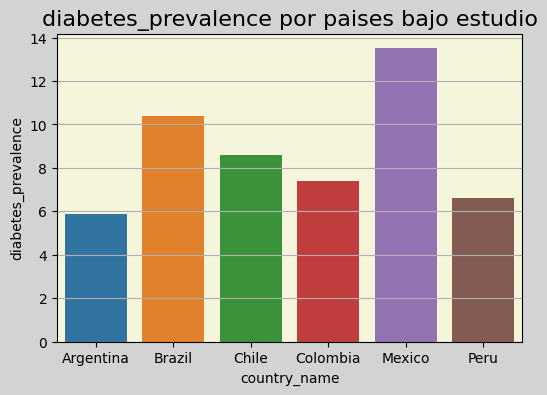

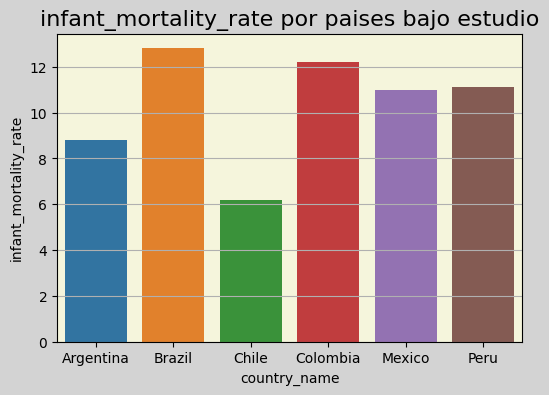

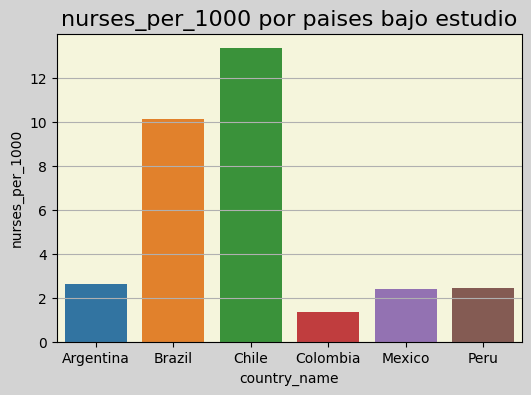

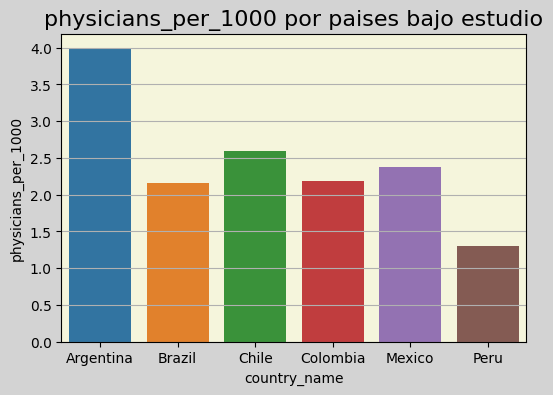

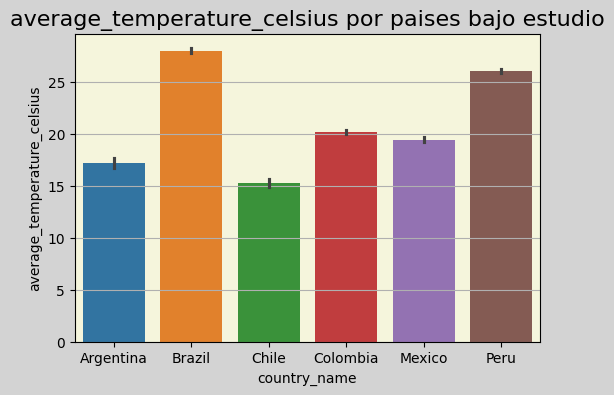

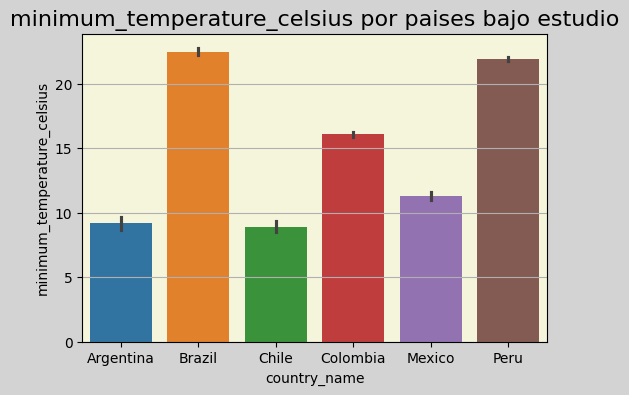

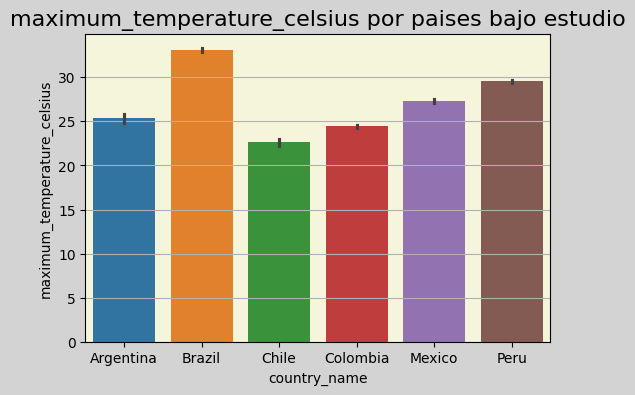

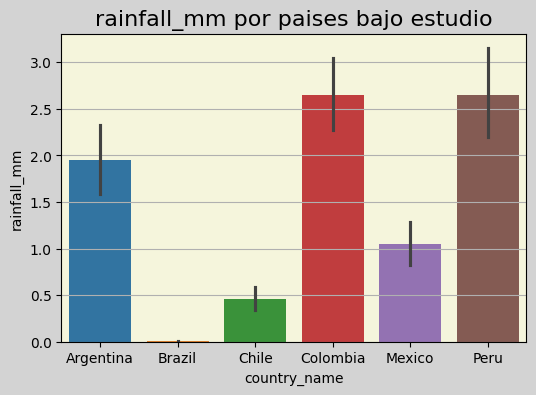

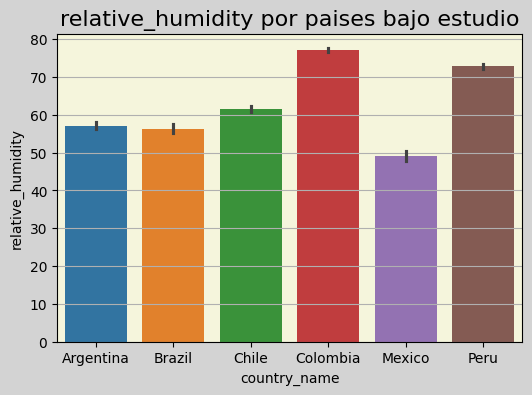

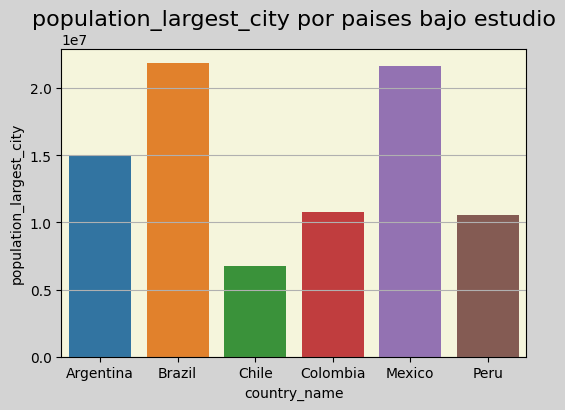

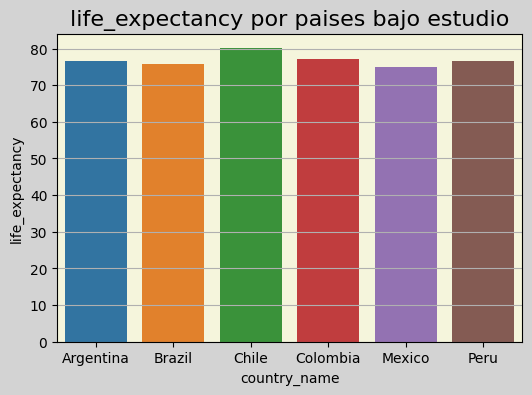

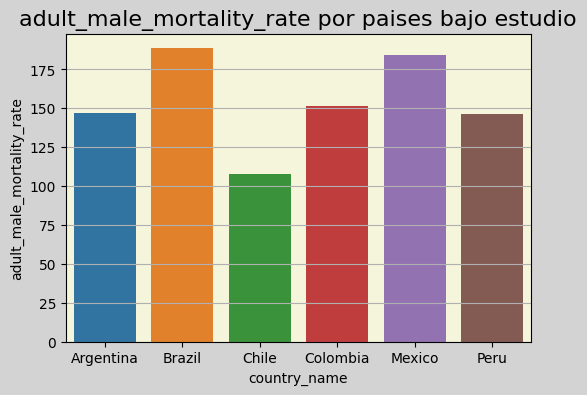

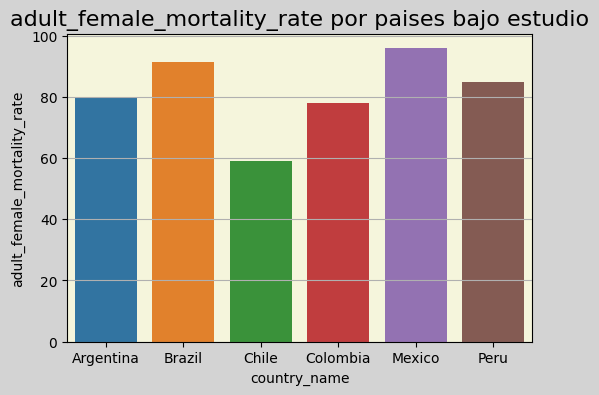

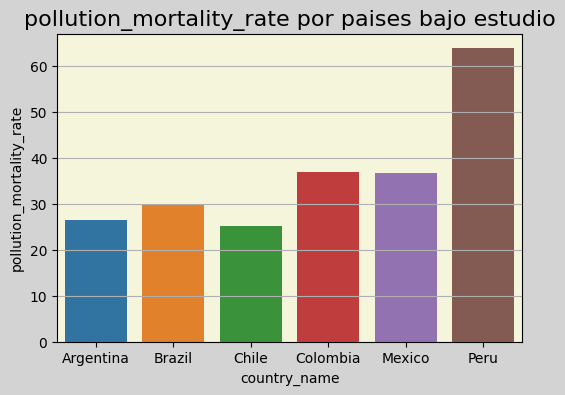

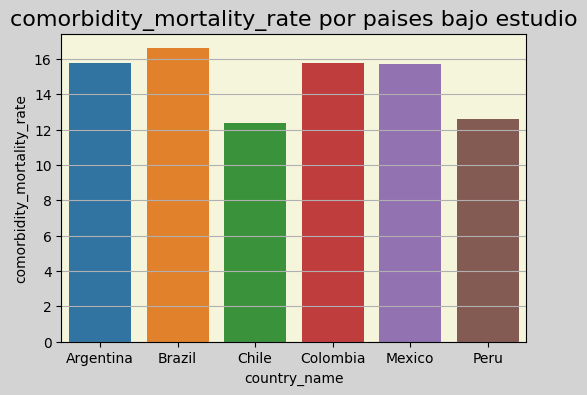

In [62]:
# Utilizamos un ciclo for para iterar sobre cada columna de nuestro dataset(expecto las columnas_excluidas)
for columnas_excluidas in data_latinoamerica_nuevo.columns:
    
# Con not, excluimos algunas columnas que no me parecen relevante para graficar en esta instancia
    if columnas_excluidas not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude', 
                'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 
                'cumulative_vaccine_doses_administered','area_sq_km','area_rural_sq_km','area_urban_sq_km','new_recovered']:
        
# Configuramos la figura y los ejes para el gráfico de barras
        fig, ax = plt.subplots(figsize=(6, 4))
        
# Creamos un gráfico de barras (barplot) utilizando seaborn, con hue le pone a cada pais un color distinto
        sns.barplot(x='country_name', y=columnas_excluidas, data=data_latinoamerica_nuevo, ax=ax, hue='country_name')
        plt.gca().set_facecolor('beige')                #Definimos el color de fondo del área del gráfico
        plt.gcf().set_facecolor('lightgray')            #Establecemos el fondo alrededor del gráfico 
        
#Añadimos un titulo y lineas cuadriculadas sobre el eje y       
        plt.title(f'{columnas_excluidas} por paises bajo estudio',fontsize=16)                 
        plt.grid(axis='y')                              #Agregamos linea cuadricula al eje y

# Mostramos el gráfico                                          
        plt.show()      

#nuevo casos confirmados, lidera Brazil seguido por Argentina y un poco más atrás Mexico. 
#nuevos decesos, Brazil también lidera (mas confirmados lleva a mas muertes), pero está seguido por Mexico (quizás se puede ver la tasa de vacunación), siendo Argentina el 5to país.
#poblacion, lidera Brazil y luego Mexico (correlación entre población, nuevos casos y nuevos decesos)
#poblacion hombres vs. Mujeres, se ve el mismo comportamiento entre ambos sexos en todos los países, lidera Brazil, seguido por Mexico, Colombia
#poblacion rural, lidera Brazil pero seguido muy de cerca por Mexico (muy alto), y seguido por Colombia 
#poblacion urbana, lidera Brazil seguida por Mexico (pero con menos cantidad con respecto al población rural)
#densidad poblacional, lidera Mexico seguido por Colombia, ver que población lideraba Brazil pero evidentemente no es lo mismo población que densidad poblacional (número de habitantes por km cuadrado)
#indice de desarrollo humano, lidera Chile (que tenia los menores indicen en la mayoría de las graficas anteriores) seguido muy de cerca por Argentina. Mientras los demás países se encuentran igualados.
#grupos etarios, la mayoría de los grupos presenta igual distribución en los países, en todos los casos lidera Brazil (recordemos que también lidera en población), seguido por Mexico. Es decir grupos etarios tiene similar comportamiento que población
#PBI por país, lidera Brazil (evidente por su estructura económica con respecto a los demás países) seguido por Mexico aunque considerablemente menor que Brazil. Peru tiene el valor mas bajo. 
# PBI por capita (se calcula dividiendo el PIB total por la población total de cada país), tiene el  valor mas alto, aunque su PIB total no es el mayor. Recordemos que en población es el menor, por lo cual el PBI total se divide por una población mas pequeña. Argentina y México tienen un comportamiento similar y relativamente alto en comparación con otros países. Brasil, a pesar de tener el PIB total más alto, tiene un PIB per cápita intermedio (recordemos que tenia la mayor población y esto influye en el calculo)
#atencion medica cada 1000, lidera Chile seguido por Brazil. Quizas Chile se respalda en su PBI por persona y Brazil por su gran espalda económica
#temperatura media, lidera Brazil seguido por Perú. Podriamos analizar estacionalidad


• Histogramas de las variables que “Sí” tenga cambios de valores

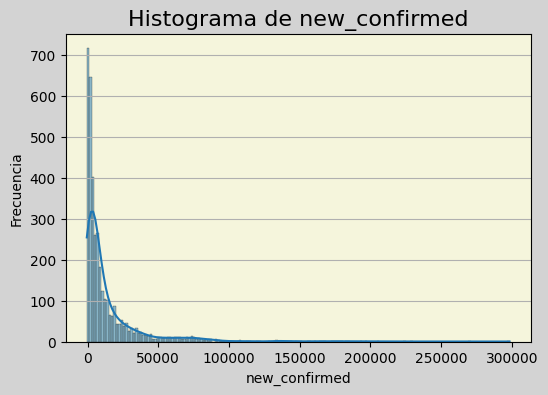

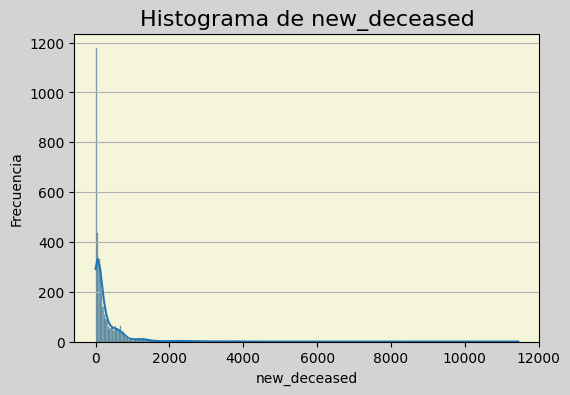

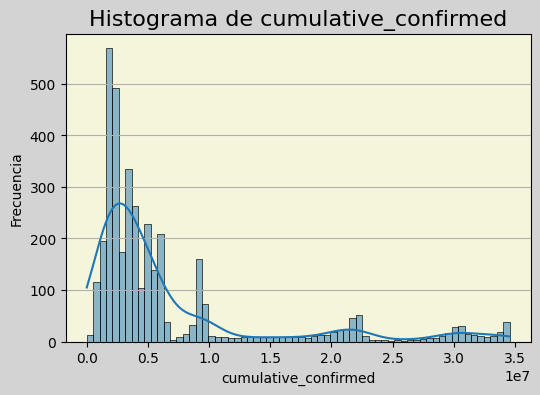

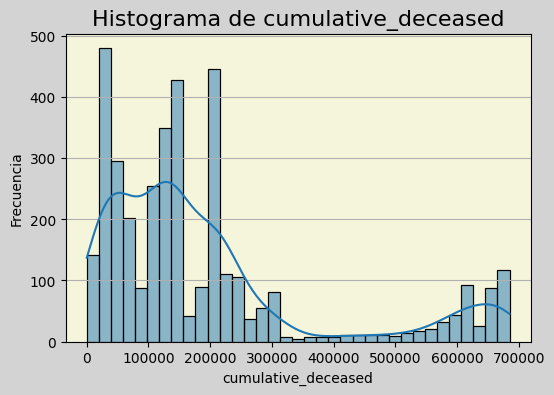

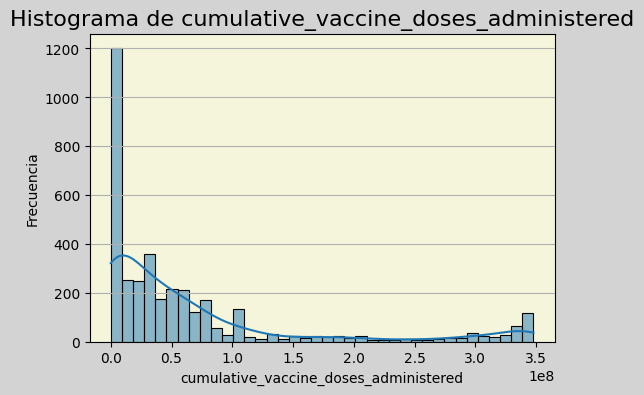

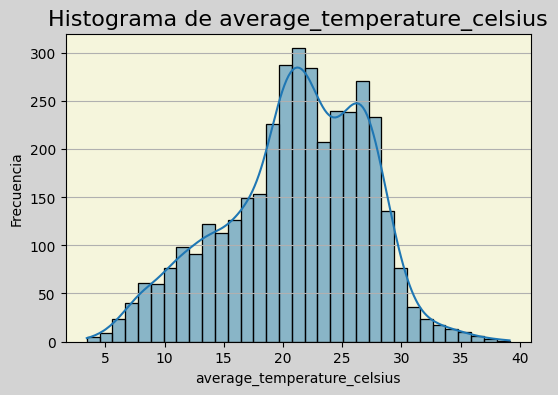

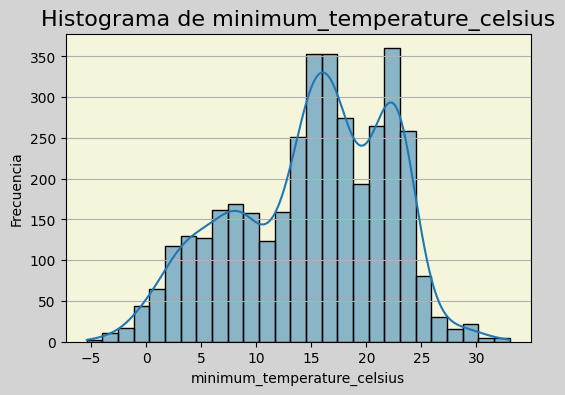

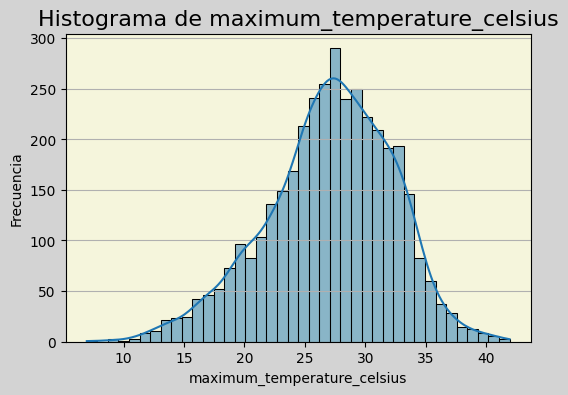

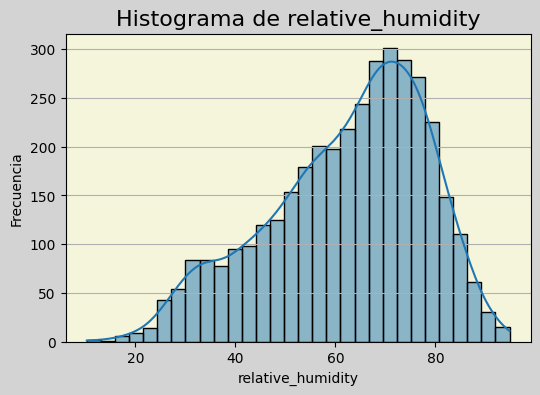

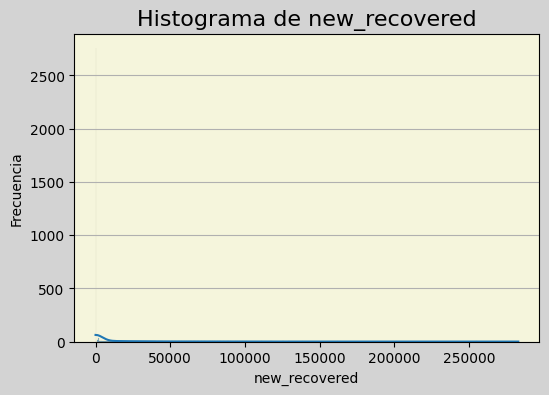

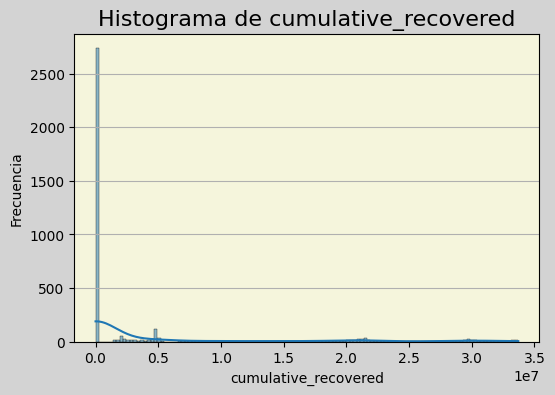

In [63]:
# Definimos una lista de columnas para las cuales queremos generar histogramas
columnas_histograma = ['new_confirmed', 'new_deceased', 'cumulative_confirmed','cumulative_deceased', 'cumulative_vaccine_doses_administered','average_temperature_celsius', 'minimum_temperature_celsius','maximum_temperature_celsius', 'relative_humidity','new_recovered', 'cumulative_recovered']

# Con un ciclo for, iteramos sobre cada columna en la lista 'columnas_histograma'
for i in data_latinoamerica_nuevo[columnas_histograma]:
    
    # Creamos una nueva figura y un conjunto de subtramas con un tamaño específico
    fig, ax = plt.subplots(figsize = (6, 4))
    
    # Creamos un histograma para la columna actual con una curva de densidad de kernel (kde), definimos el color de fondo del gráfico
    sns.histplot(data=data_latinoamerica_nuevo, x=i, kde=True)
    plt.gca().set_facecolor('beige')                #Definimos el color de fondo del área del gráfico
    plt.gcf().set_facecolor('lightgray')            #Establecemos el fondo alrededor del gráfico 

    # Establecemos el título del gráfico como 'Histograma de ' seguido del nombre de la columna actual
    plt.title(f'Histograma de {i}',fontsize=16)
    plt.ylabel('Frecuencia')                        #Renombramos el eje y
    plt.grid(axis='y')                              # Agregar lineas solo en el eje y
    # Mostramos el gráfico
    plt.show()

#nuevos confirmados (recordemos que está columna presentaba muchos nulls, entonces los completamos con 0 ya que no tenemos forma de recuperar esos datos); 
#la mayoría de los días tienen bajos nuevos casos confirmados, pero hay algunos días con un numero mas alto de confirmados ( los brotes de covid produjeron un gran numero de casos en cortos periodos)

#decesos acumulados, presenta dos picos (entre los 100mil casos y otro hacia los 600mil casos). La mayoría de países/días tienen un numero bajo de 
# fallecidos acumulados, mientras que el 2do pico hay un numero mayor de países/días con fallecidos acumulados.

#nuevos casos acumulados: la mayoría de los países/días tienen un numero bajo de casos confirmados acumulados, hacia la derecha hay algunos días/países con altos casos acumulados (quizás por brotes), 
# la frecuencia disminuye a medida que el número de casos confirmados acumulados aumenta. La presencia de valores altos en ambas medidas (decesos acumulados y nuevos casos acumulados) podría estar 
# indicando países con grandes poblaciones y/o con altas tasas de contagio y mortalidad.


- Diagrama de dispersión de la temperatura media contra los casos confirmados.

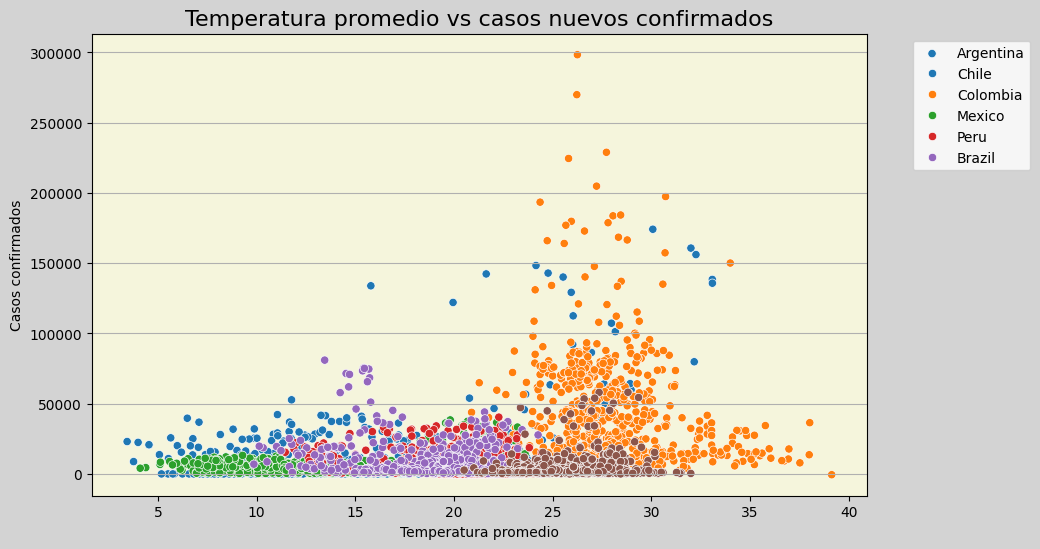

In [64]:
# Relación entre average_temperature_celsius y new_confirmed

#Creamos la figura y los ejes
fig,ax= plt.subplots(figsize=(10,6))

#Creamos el gráfico de dispersión, hue me da un color por cada pais
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_nuevo, hue='country_name')
plt.gca().set_facecolor('beige')                    #Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                #Establecemos el fondo alrededor del gráfico 

#Definimos el titulo del gráfico y de los ejes
plt.title('Temperatura promedio vs casos nuevos confirmados',fontsize=16)
plt.xlabel('Temperatura promedio')              #Titulo eje x
plt.ylabel('Casos confirmados')                 #Titulo eje y
plt.grid(axis='y')                              #Agregamos lineas cuadrículas solo en el eje y
plt.legend(paises_seleccionados, bbox_to_anchor=(1.05, 1), loc='upper left')            #Añadimos las etiquetas de los nombres de los paises_seleccionados por fuera de nuestro gráfico

#Mostramos el gráfico
plt.show()                                      

#Se puede observar que en algunos paises la temperatura no influye directamente en la cantidad de casos confirmados y en otros si. 
# Podemos verificar que sucede en Brasil, Colombia tiene dispersion mayor 
#Por esta relación con los casos confirmados, realizo un análisis de la temperatura promedio con la cantidad de muertes

- Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

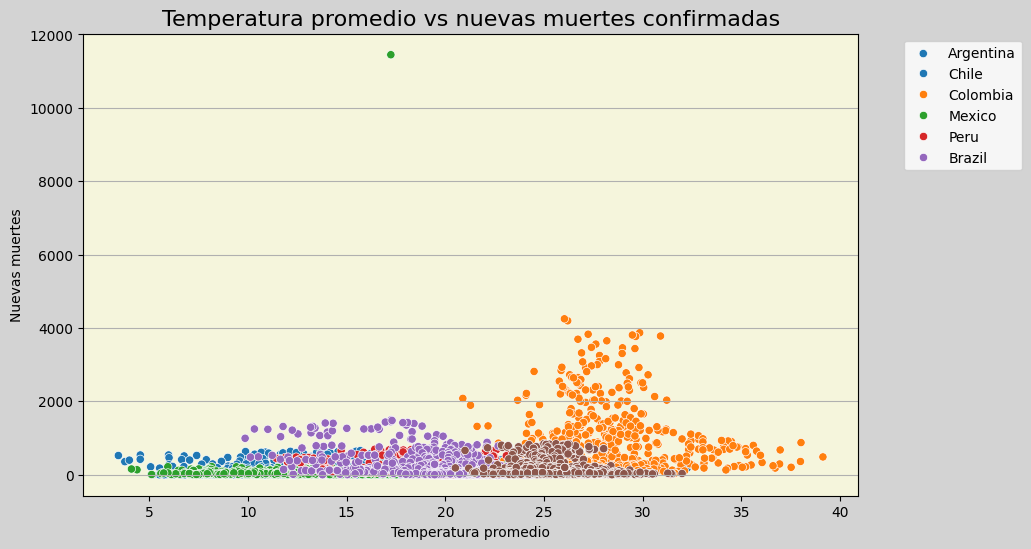

In [65]:
#Relacionamos la media de la temperatura con las muertes, a través de las columnas 'average_temperature_celsius' y 'new_deceased'

#Creamos la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))                                 

#Creamos el gráfico de dispersión
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=data_latinoamerica_nuevo, hue='country_name')
plt.gca().set_facecolor('beige')                        #Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                    #Establecemos el fondo alrededor del gráfico 

#Definimos el titulo del gráfico y de los ejes
plt.title('Temperatura promedio vs nuevas muertes confirmadas',fontsize=16)                    
plt.xlabel('Temperatura promedio')                                      #Titulo eje x
plt.ylabel('Nuevas muertes')                                            #Titulo eje y
plt.grid(axis='y')                                                      #Agregamos lineas cuadrículas solo en el eje y
plt.legend(paises_seleccionados, bbox_to_anchor=(1.05, 1), loc='upper left')            #Añadimos las etiquetas de los nombres de los paises_seleccionados por fuera de nuestro gráfico

#Mostramos el gráfico
plt.show() 

#Hay un valor atípico en Mexico, el cual se expondrá en el informe.
#Mayor dispersion en Colombia

• Comportamiento de las dosis administradas de todos los países (valor medio)

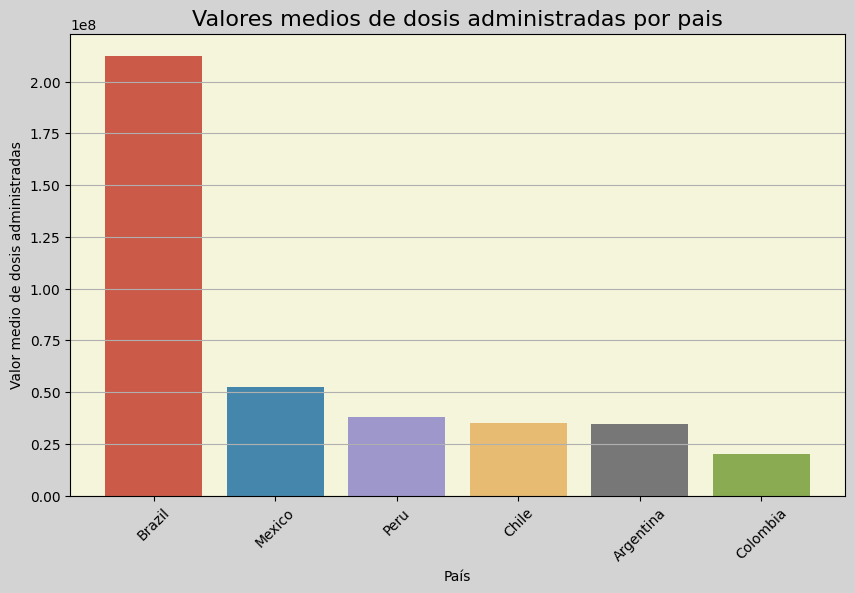

In [66]:
# Calculamos el valor medio (mean) de las dosis administradas por país, y los agrupamos por pais (groupby de country_name), y lo ordenamos de mayor a menor
dosis_media = data_latinoamerica_nuevo.groupby('country_name')['cumulative_vaccine_doses_administered'].mean().sort_values(ascending=False)

# Creamos la figura y un eje para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Creamos un gráfico de barras para mostrar el valor medio de las dosis administradas por país
bars = plt.bar(dosis_media.index, dosis_media.values,color=['#CC5A49', '#4586AC', '#9E97CC', '#E7BC72', '#777777', '#8AAB51'])
plt.gca().set_facecolor('beige')                        #Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                    #Establecemos el fondo alrededor del gráfico 
plt.grid(axis='y')                                      #Agregamos lineas cuadriculas solo en el eje y                                
plt.xticks(rotation=45)

#Definimos el titulo del gráfico y de los ejes
plt.title('Valores medios de dosis administradas por pais',fontsize=16)    
plt.xlabel('País')                                      #Titulo eje x
plt.ylabel('Valor medio de dosis administradas')        #Titulo eje y
#########plt.legend(paises_seleccionados, bbox_to_anchor=(1.05, 1), loc='upper left')            #Añadimos las etiquetas de los nombres de los paises_seleccionados

#Mostramos el gráfico
plt.show()

#Brazil sigue siendo el país con mayor cantidad de dosis promedio administradas (considerar que tambien tiene la mayor poblacion), seguido por Mexico

•	Evolución de dosis administradas por mes de cada país.

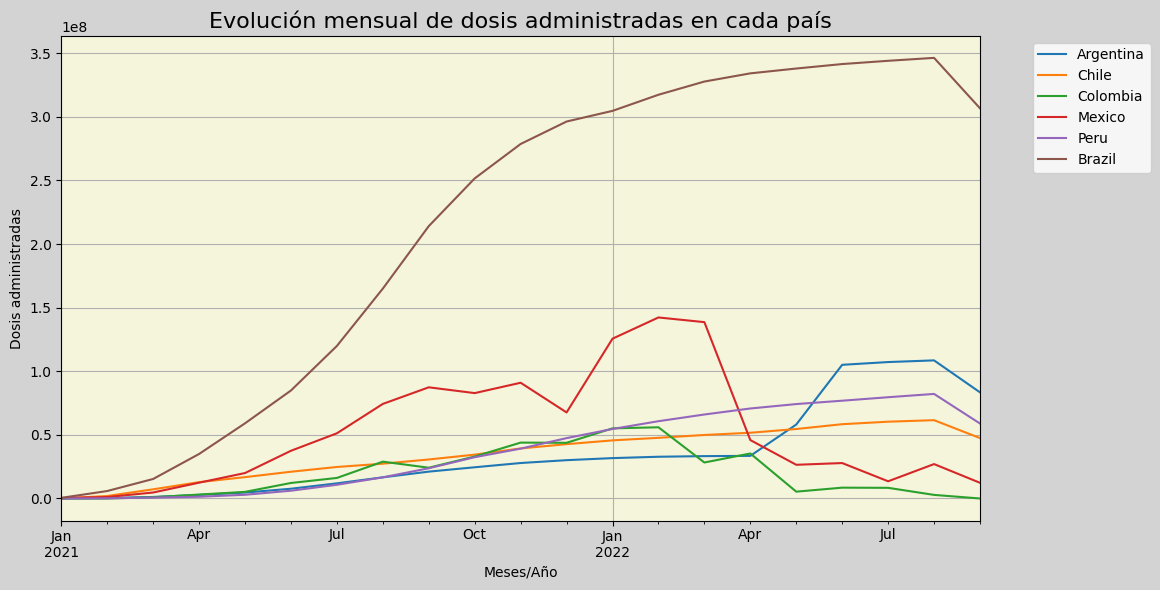

In [67]:
# Creamos la figura y un eje para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

#Con un ciclo for, usamos Resample y modificamos la frecuencia de los datos a una frecuencia mensual, a su vez con mean obtenemos el promedio de los valores numéricos
#y seleccionamos la columna 'cumulative_vaccine_doses_administered' para hacer la gráfica a partir de ella
for pais in paises_seleccionados:
    data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'] == pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()

#Definimos el titulo del gráfico y de los ejes
plt.title('Evolución mensual de dosis administradas en cada país',fontsize=16)
plt.xlabel('Meses/Año')                                         #Titulo eje x
plt.ylabel('Dosis administradas')                               #Titulo eje y

#Personalizamos nuestro gráfico
plt.gca().set_facecolor('beige')                                #Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                            #Establecemos el fondo alrededor del gráfico 
plt.grid()                                                      #Agregamos lineas cuadriculas 
plt.tight_layout()                                              #Ajusta los parámetros para que no se superpongan

plt.legend(paises_seleccionados, bbox_to_anchor=(1.05, 1), loc='upper left')            #Añadimos las etiquetas de los nombres de los paises_seleccionados

#Mostramos el gráfico
plt.show()

#Brazil sigue liderando la cantidad de dosis administradas, siendo Julio/Agosto de 2022 los meses con mayores aplicaciones de vacunas en este pais, luego tenemos una caida
#Colombia: a partir de julio/2022 registra un disminuir en las dosis administradas
# #Mexico tiene varios saltos, quizas por falta de datos

- Muertes por mes de cada país.

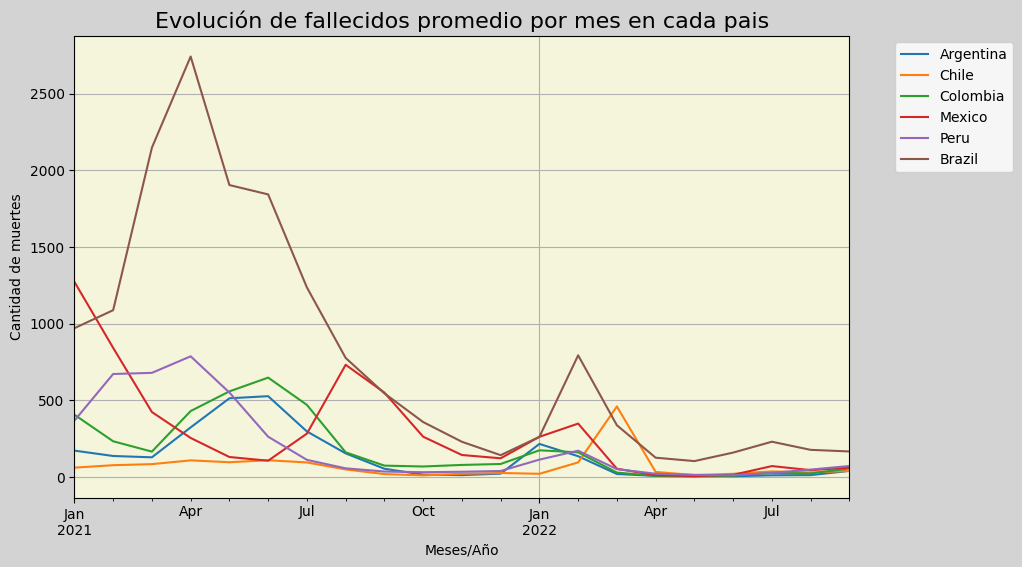

In [68]:
# Creamos la figura y un eje para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

#Con un ciclo for, usamos Resample y modificamos la frecuencia de los datos a una frecuencia mensual, a su vez con mean obtenemos el promedio de los valores numéricos
#y seleccionamos la columna 'new_deceased' para hacer la gráfica a partir de ella
for pais in paises_seleccionados:
     data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'] == pais].resample('ME').mean(numeric_only=True)['new_deceased'].plot(ax=ax, label=pais)

#Personalizamos nuestro gráfico
plt.gca().set_facecolor('beige')                       #Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                   #Establecemos el fondo alrededor del gráfico 

#Definimos el titulo del gráfico y de los ejes
plt. title('Evolución de fallecidos promedio por mes en cada pais',fontsize=16)
plt.xlabel('Meses/Año')                                #Titulo eje x
plt.ylabel('Cantidad de muertes')                      #Titulo eje y
plt.grid()                                             #Agregamos lineas cuadriculas

#Añadimos las etiquetas de los nombres de los paises_seleccionados
plt.legend(paises_seleccionados, bbox_to_anchor=(1.05, 1), loc='upper left')

#Mostramos el gráfico
plt. show()
#Brazil lidera la cantidad media de fallecidos por mes, registrando un pico en abril/2021 aprox (considerando el grafico anterior, ver que la aplicacion de vacunas 
# inicia entre enero y febrero del mismo año aprox) y luego tiene otro pico en febrero/2022 aprox (quizas por la estacion de verano, la disminucion de los cuidados y la generacion de brotes)
#Chile tiene una evolución bastante uniforme, excepto en marzo/2022 donde genera un pico (de igual forma se comporta la evolucion de aplicacion de dosis)

- Casos confirmados por mes de cada país.

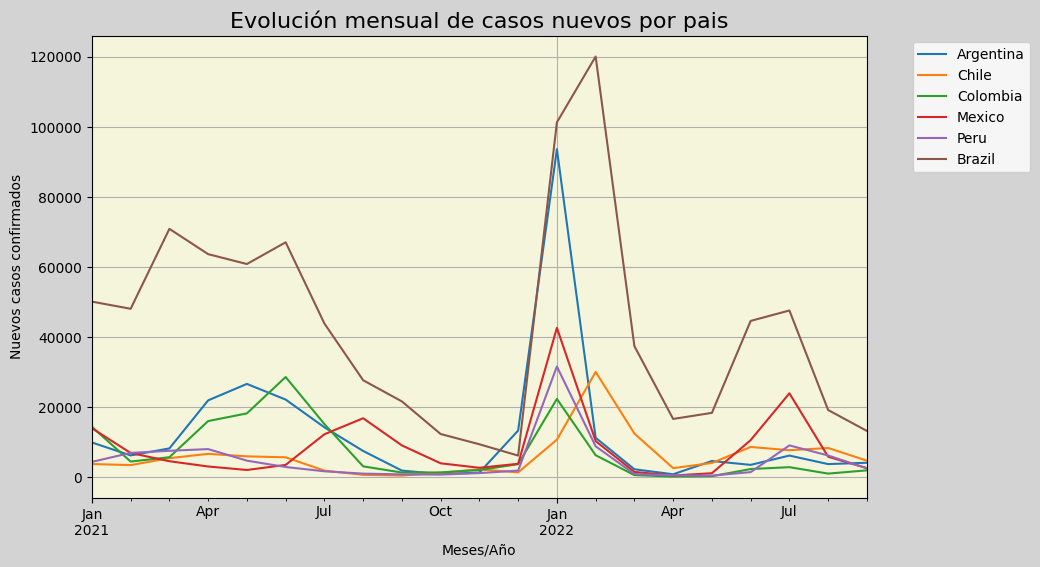

In [69]:
# Creamos la figura y un eje para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

#A traves de un ciclo for, usamos resample para iterar y transformar la frecuencia hacia frecuencia mensual. A su vez con mean obtenemos los valores medios; 
#y definimos la columna'new_confirmed' para graficar a partir de ella
for pais in paises_seleccionados:
    data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'] == pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax, label=pais)

#Personalizamos nuestro gráfico
plt.gca().set_facecolor('beige')                                #Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                            #Establecemos el fondo alrededor del gráfico

#Definimos el titulo del gráfico y de los ejes
plt. title('Evolución mensual de casos nuevos por pais',fontsize=16)
plt.xlabel('Meses/Año')                                         #Titulo eje x
plt.ylabel('Nuevos casos confirmados')                          #Titulo eje y
plt.grid()                                                      #Agregamos lineas cuadriculas

#Añadimos las etiquetas de los nombres de los paises_seleccionados
plt.legend(paises_seleccionados, bbox_to_anchor=(1.05, 1), loc='upper left')

#Mostramos el gráfico
plt. show()

#Vemos que 4 de 6 paises tuvieron su pico de casos nuevos en enero/2022, excepto por Brazil y Chile cuyo pico fue entre febrero/marzo. 
#Todos los paises del estudio, excepto Brazil, comenzaron en enero/2021 con menos de 20000 casos nuevos, mientras para ese entonces Brazil ya registraba aprox 50000 casos nuevos (como vimos
# en el grafico anterior, las la evolucion de la cantidad de fallecidos tiene igual comportamiento)

•	Recuperaciones de casos por mes de cada país

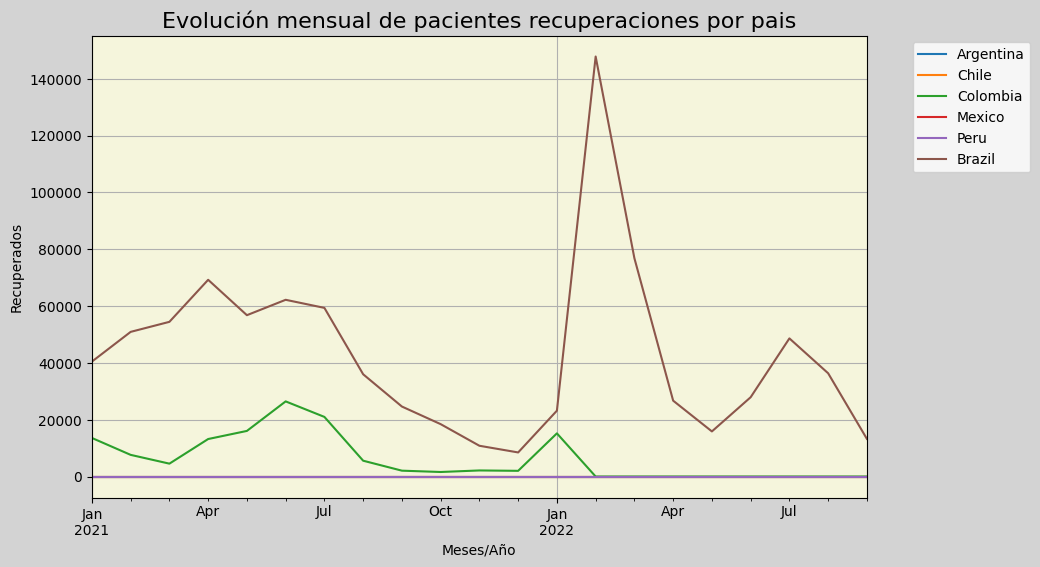

In [70]:
# Creamos la figura y los ejes para el gráfico de evolución
fig, ax = plt.subplots(figsize=(10, 6))

#A traves de un ciclo for, usamos resample para iterar y transformar la frecuencia hacia frecuencia mensual. A su vez con mean obtenemos los valores medios de la columna de personas recuperadas; 
#y definimos la columna'new_recovered' para graficar a partir de ella
for i in paises_seleccionados:
    data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'] == i].resample('ME').mean(numeric_only=True)['new_recovered'].plot(ax=ax, label=pais)

#Personalizamos nuestro gráfico
plt.gca().set_facecolor('beige')                                #Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                            #Establecemos el fondo alrededor del gráfico

#Definimos el titulo del gráfico y de los ejes
plt.title('Evolución mensual de pacientes recuperaciones por pais',fontsize=16)
plt.xlabel('Meses/Año')                                         #Titulo eje x
plt.ylabel('Recuperados')                                       #Titulo eje y
plt.grid()                                                      #Agregamos lineas cuadriculas

#Añadimos las etiquetas de los nombres de los paises_seleccionados
plt.legend(paises_seleccionados, bbox_to_anchor=(1.05, 1), loc='upper left')

#Mostramos el gráfico
plt. show()

#Hay una posible falla en los datos, aunque en realidad esta columna tenía datos solo para Brazil y Colombia y para los demás paises tenía nulls, los cuales se reemplazaron por 0.
#Ver que Brazil presenta pico entre febrero y marzo de pacientes recuperados, sin embargo en el grafico anterior vimos que para esa fecha tambien presento pico de nuevos casos.

•	Recuperaciones de casos por mes de cada país (acumulado)

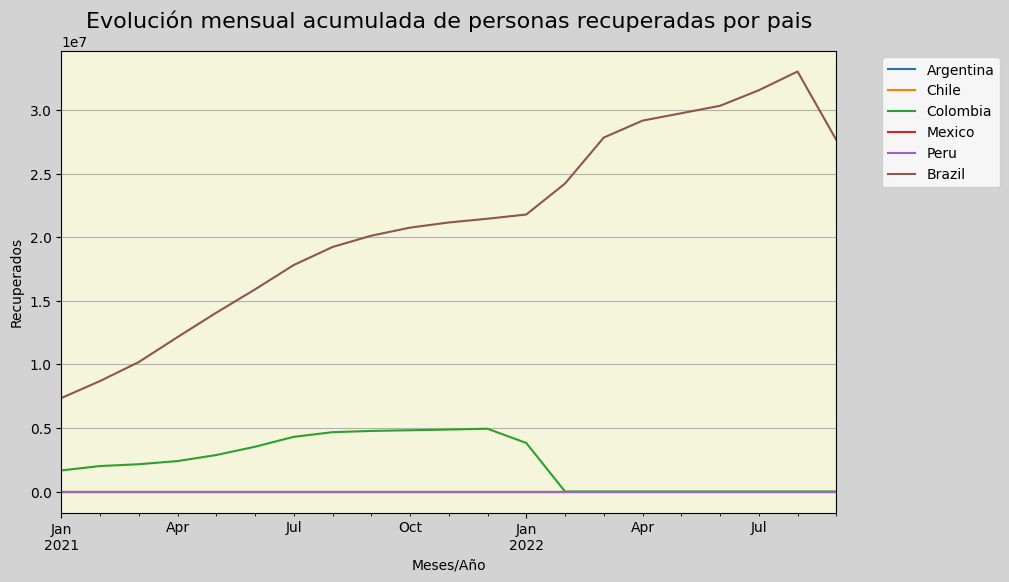

In [71]:
# Creamos la figura y los ejes para el gráfico de evolución
fig, ax = plt.subplots(figsize=(10, 6))

#A traves de un ciclo for, usamos resample para iterar y transformar la frecuencia hacia frecuencia mensual. A su vez con mean obtenemos los valores medios del acumulado de personas recuperadas; 
#y definimos la columna'cumulative_recovered' para graficar a partir de ella
for pais in paises_seleccionados:
    data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'] == pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot(ax=ax, label=pais)

#Personalizamos nuestro gráfico
plt.gca().set_facecolor('beige')                                #Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                            #Establecemos el fondo alrededor del gráfico

#Definimos el titulo del gráfico y de los ejes
plt. title('Evolución mensual acumulada de personas recuperadas por pais',fontsize=16)
plt.xlabel('Meses/Año')                                         #Titulo eje x
plt.ylabel('Recuperados')                                       #Titulo eje y
plt.grid(axis='y')                                              #Agregamos lineas cuadriculas

#Añadimos las etiquetas de los nombres de los paises_seleccionados
plt.legend(paises_seleccionados, bbox_to_anchor=(1.05, 1), loc='upper left')

#Mostramos el gráfico
plt. show()

#Hay una posible falla en los datos, recordamos que habia datos solo para Brazil y Colombia y los demás paises se completaron con 0.
#Al ser un acumulado es natural que la tendencia sea positiva, en Colombia se reemplazo con 0 los ultimos periodos por lo cual se registra la caida

•	Comparación del Número de Casos Nuevos entre Países.

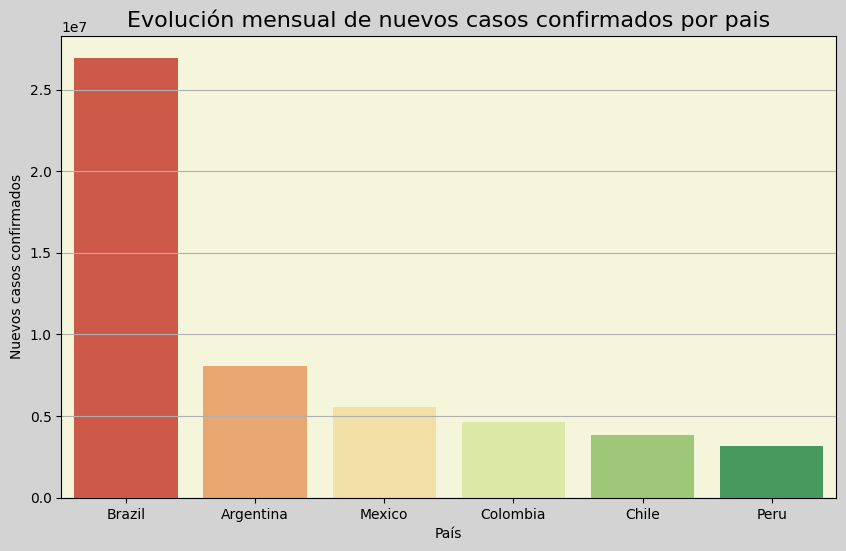

In [72]:
#Agrupamos los datos por pais (groupby), definimos trabajar con la suma y graficar a partir de la columna de new_confirmed y ordenarlos de forma descendiente. Todo esto lo definimos en la variable casos_nuevos_pais
casos_nuevos_pais = data_latinoamerica_nuevo.groupby('country_name')['new_confirmed'].sum().sort_values(ascending=False)

#Creamos la figura y los ejes para el gráfico
plt.figure(figsize=(10, 6))

# Definimos una paleta de colores con Seaborn
palette = sns.color_palette('deep', len(casos_nuevos_pais))

#Definimos el grafico como de barras y lo personalizamos
sns.barplot(x=casos_nuevos_pais.index, y=casos_nuevos_pais.values,hue=casos_nuevos_pais.index,palette='RdYlGn', legend=False)
plt.gca().set_facecolor('beige')                                #Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                            #Establecemos el fondo alrededor del gráfico

#Definimos el titulo del gráfico y de los ejes
plt.title('Evolución mensual de nuevos casos confirmados por pais',fontsize=16)
plt.xlabel('País')                                              #Titulo eje x
plt.ylabel('Nuevos casos confirmados')                          #Titulo eje y
plt.grid(axis='y')                                              #Agregamos linea de cuadricula al eje y

#Mostramos el gráfico
plt. show()

#Concuerda con la evolucion mensual media de nuevos confirmados que analizamos antes, donde Brazil registraba la mayor cantidad seguido de Argentina en su pico. 


•	Dosis acumuladas por país

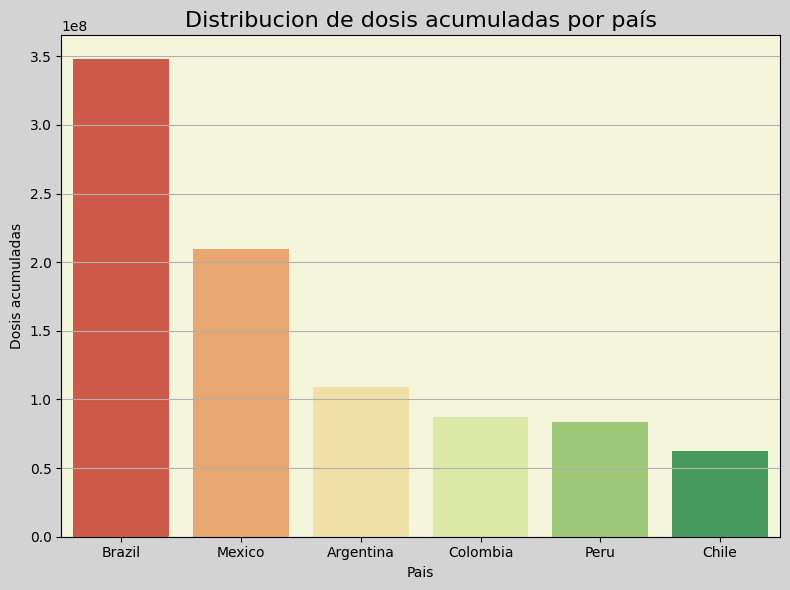

In [73]:
#Agrupamos los datos por pais (groupby), definimos trabajar el valor maximo de cada pais y graficar a partir de la columna de 
#cumulative_vaccine_doses_administered y ordenarlos de forma descendiente. Todo esto lo definimos en la variable dosis_acumuladas_por_pais
dosis_acumuladas_por_pais = data_latinoamerica_nuevo.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

# Definir una paleta de colores con Seaborn
palette = sns.color_palette('deep', len(dosis_acumuladas_por_pais))

#Creamos la figura y los ejes para el gráfico
plt.figure(figsize=(8, 6))

#Definimos el grafico como de barras y lo personalizamos. Con hue estamos diciendo que los colores deben basarse en la agrupacion de paises
sns.barplot(x=dosis_acumuladas_por_pais.index, y=dosis_acumuladas_por_pais.values, hue=dosis_acumuladas_por_pais.index, palette='RdYlGn', legend=False)
plt.gca().set_facecolor('beige')                                #Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                            #Establecemos el fondo alrededor del gráfico 

#Definimos el titulo del gráfico y de los ejes
plt.title('Distribucion de dosis acumuladas por país',fontsize=16)
plt.xlabel('Pais')                                              #Titulo eje x
plt.ylabel('Dosis acumuladas')                                  #Titulo eje y
plt.grid(axis='y')                                              #Agregamos linea de cuadricula al eje y
plt.tight_layout()                                              #Ajustamos la relacion entre los elementos y el espacio

#Mostramos el gráfico
plt.show()

#Evolucion mensual de dosis administradas tambien nos mostraba que la aplicacion de vacunas estaba liderada por Brazil seguida de Mexico. Considerar que Chile tiene menor poblacion
#Tambien lo vimos en el grafico de barras de poblacion por pais

- Boxplot de temperatura media de cada país

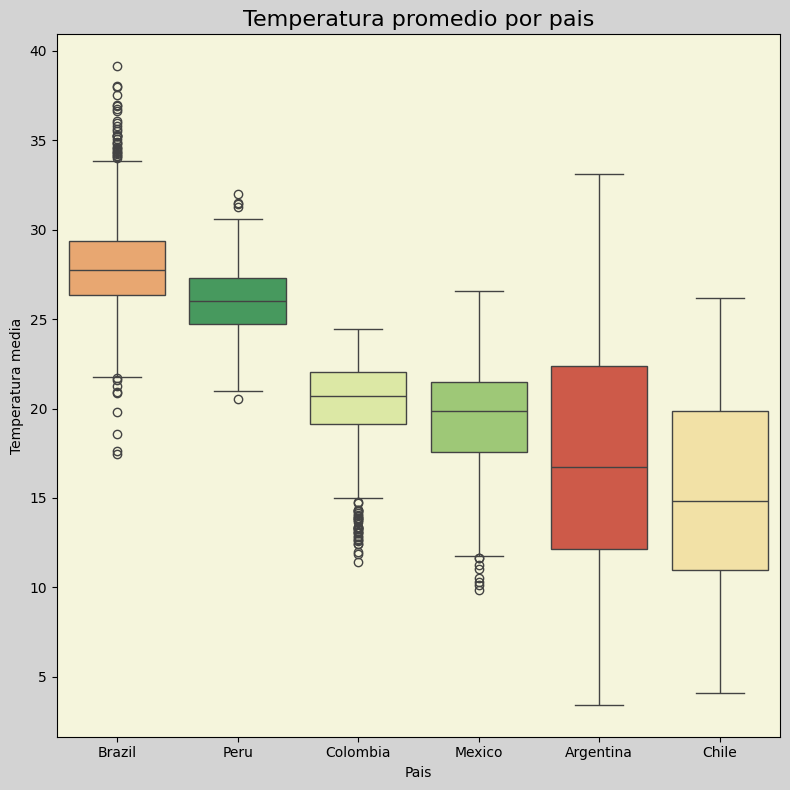

In [76]:
# Calcular la temperatura promedio por país y ordenarlos de mayor a menor
#Agrupamos los datos por pais (groupby), definimos trabajar con la temperatura promedio y graficar a partir de la columna de 
#average_temperature_celsius y ordenarlos de forma descendiente. Todo esto lo definimos en la variable temperatura_media_paises
temperatura_media_paises = data_latinoamerica_nuevo.groupby('country_name')['average_temperature_celsius'].mean().sort_values(ascending=False).index

#Creamos la figura y los ejes para el gráfico
plt.figure(figsize=(8, 8))

# Creamos un gráfico de caja, el cual será ordenado por temperatura promedio calculada en la variable temperatura_media_paises. Luego lo personalizamos
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_nuevo, order=temperatura_media_paises, hue='country_name' ,palette= 'RdYlGn')
plt.gca().set_facecolor('beige')                                #Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                            #Establecemos el fondo alrededor del gráfico 

#Definimos el titulo del gráfico y de los ejes
plt.title('Temperatura promedio por pais',fontsize=16)
plt.xlabel('Pais')                                              #Titulo eje x
plt.ylabel('Temperatura media')                                 #Titulo eje x
plt.tight_layout()                                              #Ajustamos la relacion entre los elementos y el espacio

#Mostramos el gráfico
plt.show()

#Brazil tiene la temperatura media mas alta, seguido de Peru y colombia, mientras que Chile y Argentina (paises que se encuentran al sur de Latinoamerica) tienen temperaturas medias mas bajas.
#Podriamos ver si hay relacion entre las temperaturas medias altas y la duracion de supervivencia del covid en el ambiente

•	Violinplot de las variables que “Sí” tenga cambios de valores.

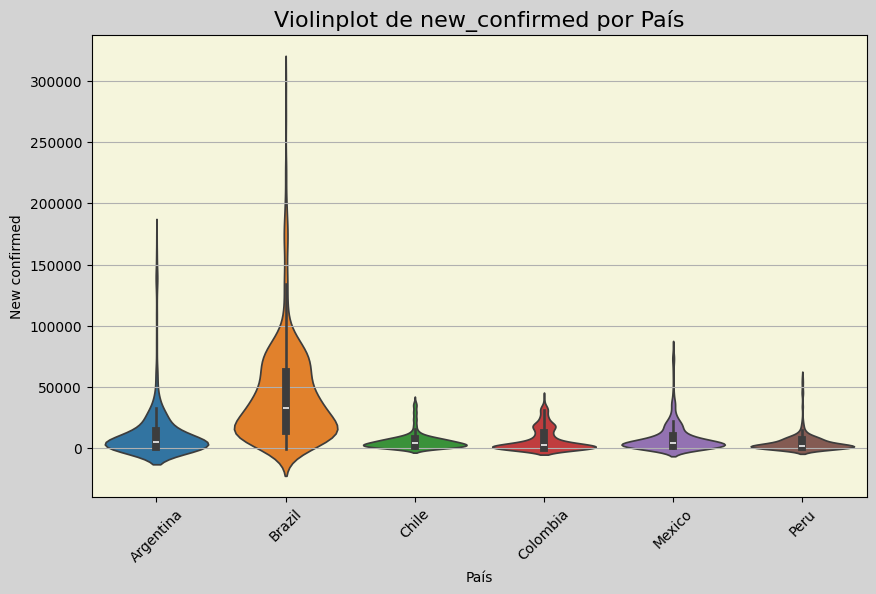

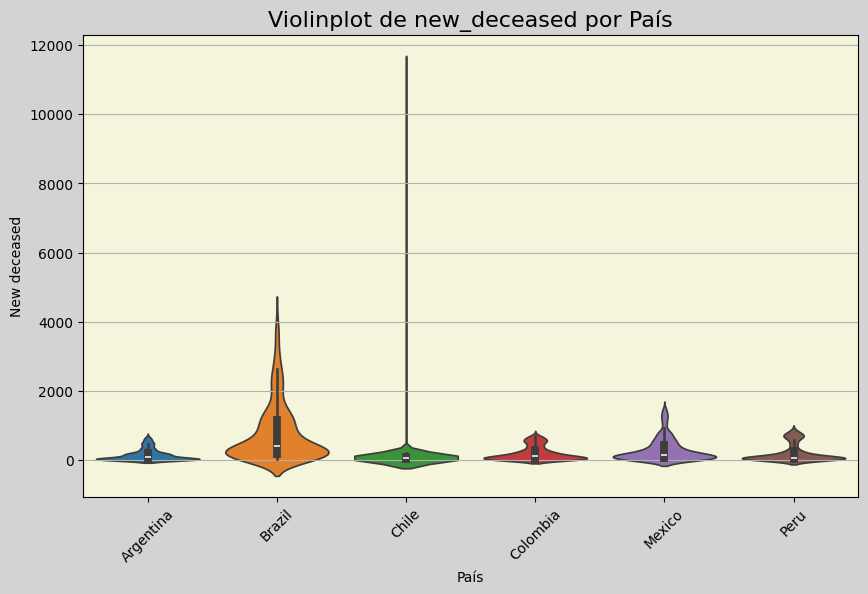

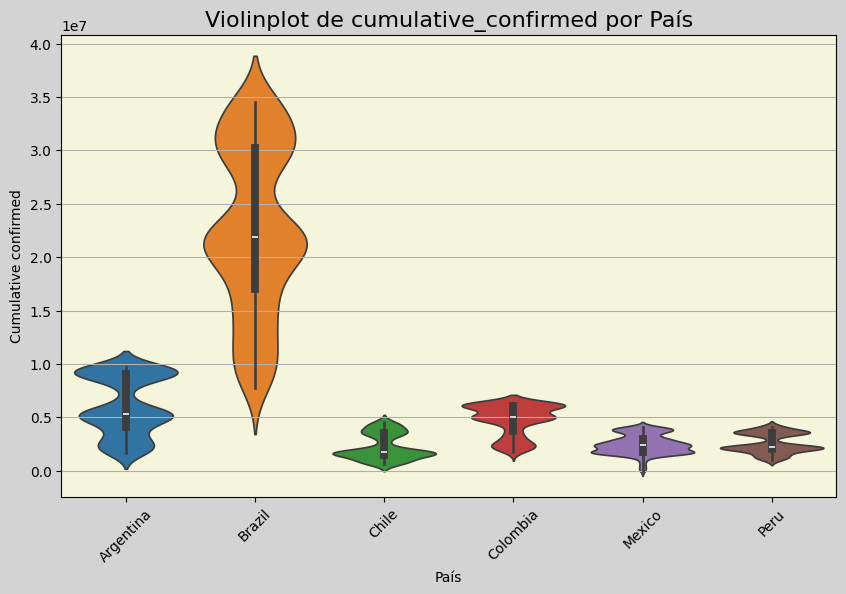

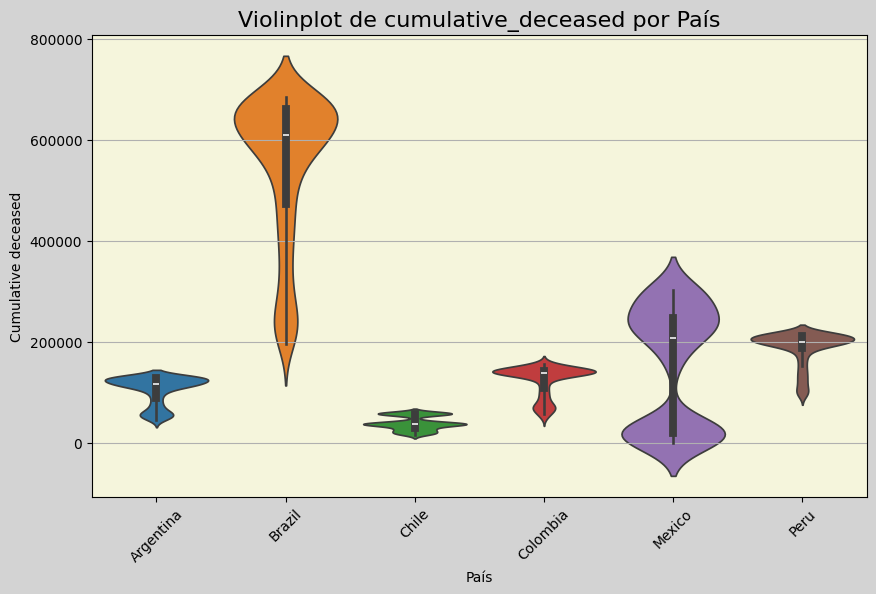

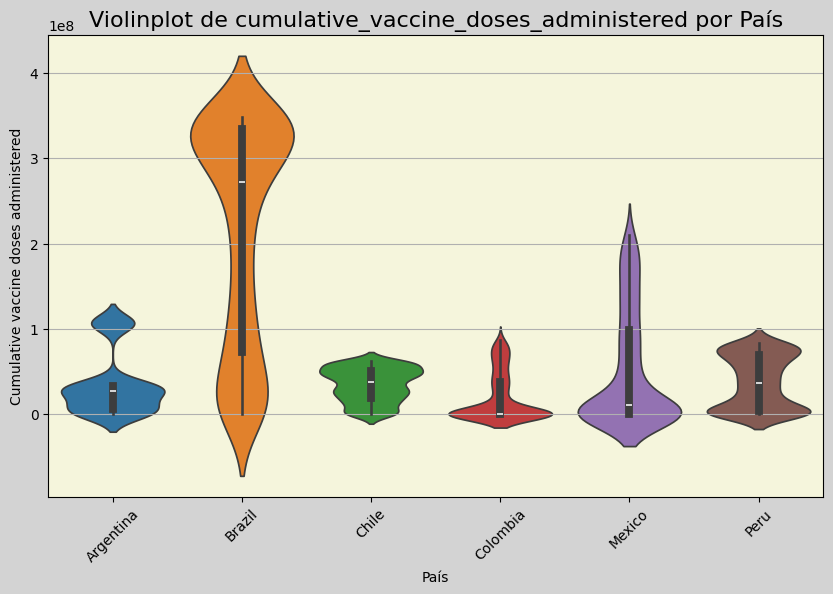

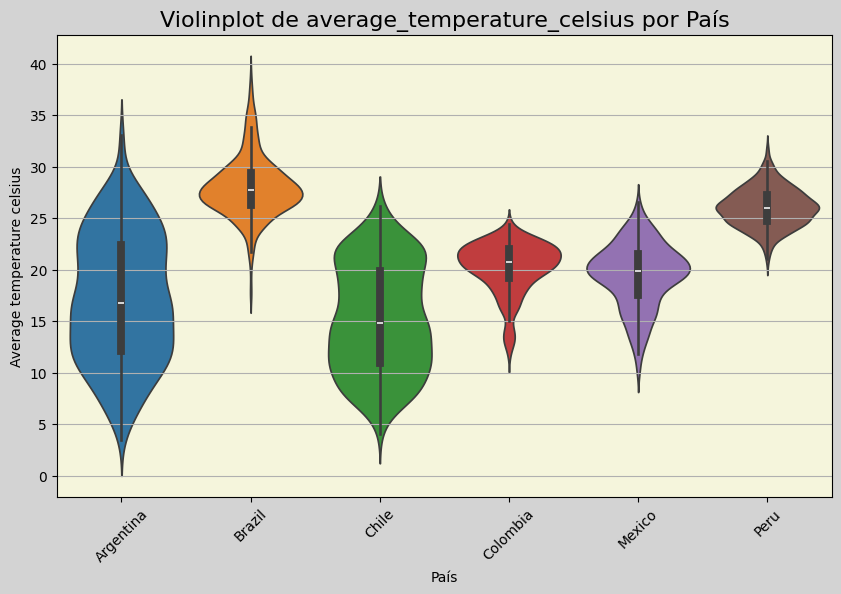

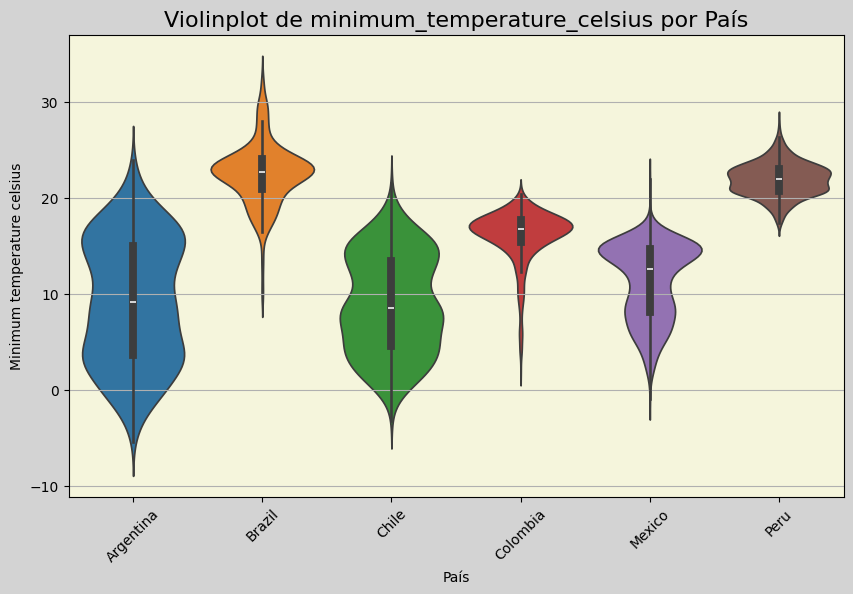

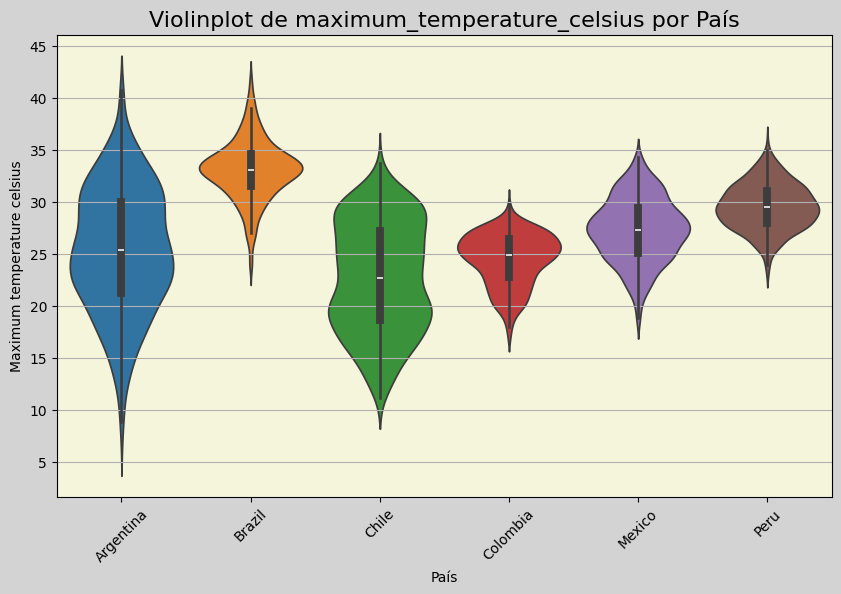

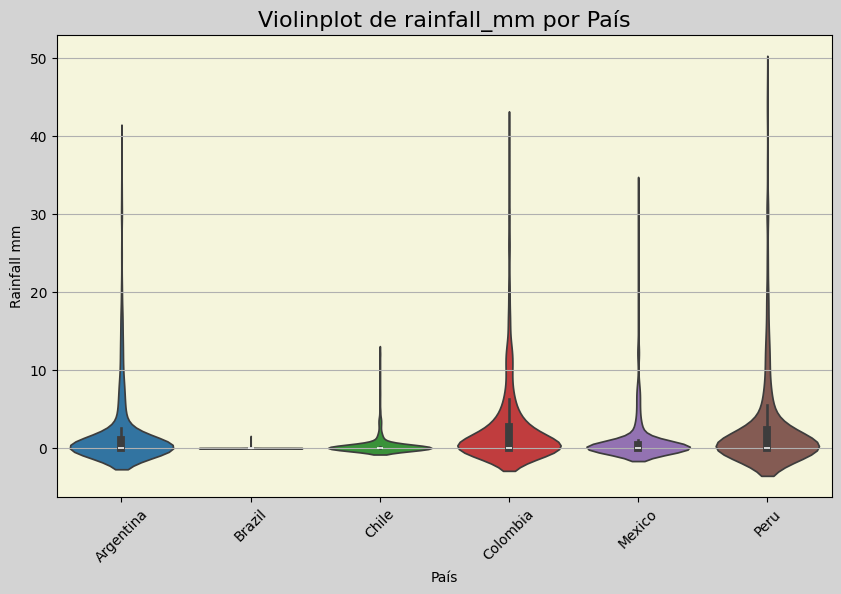

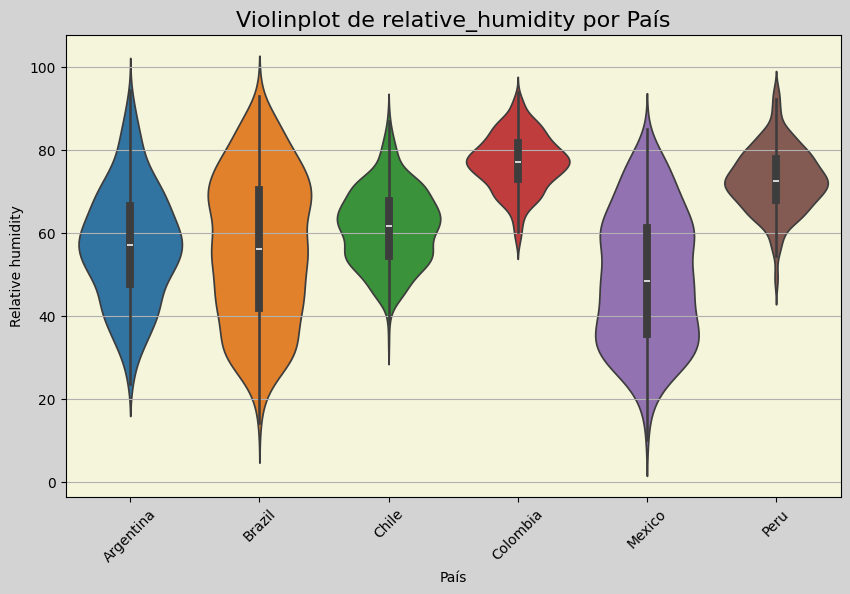

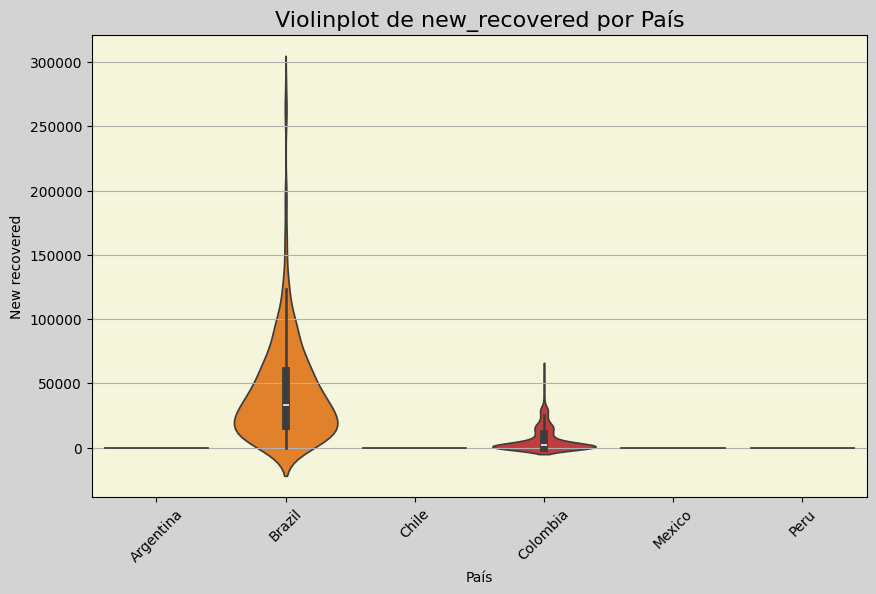

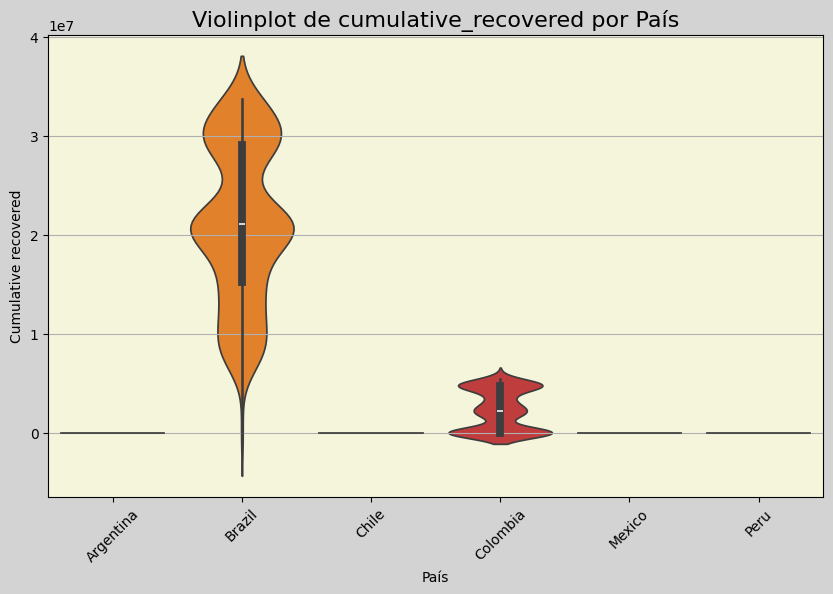

In [77]:
# Creamos un dataframe con las columnas que tienen más de 6 valores únicos/diferentes por país
columnas_valores_unicos = []
for unicos in data_latinoamerica_nuevo.columns:
    if unicos not in ['location_key', 'date', 'country_name', 'country_code', 'latitude', 'longitude']:
        if data_latinoamerica_nuevo[unicos].nunique() > 6:
            columnas_valores_unicos.append(unicos)

# Agregamos a la variable creada, la columna country_name para filtrar por país
columnas_valores_unicos.append('country_name')

# Creamos un dataframe con la columna de valores únicos
unicos_filtrados_1 = data_latinoamerica_nuevo[columnas_valores_unicos]

# Creamos el gráfico de violín para todas las columnas seleccionadas
for unicos in unicos_filtrados_1.columns:
    if unicos != 'country_name':
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=unicos, data=unicos_filtrados_1, hue='country_name')  # Asignamos x a hue, que es country_name
        plt.gca().set_facecolor('beige')  # Definimos el color de fondo del área del gráfico
        plt.gcf().set_facecolor('lightgray')  # Establecemos el fondo alrededor del gráfico
        plt.grid(axis='y')  # Agregamos líneas cuadriculadas solo en el eje y
        plt.xticks(rotation=45)

        # Definimos el título del gráfico y de los ejes
        plt.title(f'Violinplot de {unicos} por País', fontsize=16)
        plt.xlabel('País')  # Título eje x
        plt.ylabel(unicos.replace('_', ' ').capitalize())  # Título eje y

        # Mostramos el gráfico
        plt.show()

#nuevos confirmados y nuevos confirmados acumulados: se visualiza la distribucion y liderazgo de Brazil por sobre los demas paises
#nuevos decesos: en Chile se refleja el valor atipico
#nuevos recuperados y nuevos recuperados acumulados: recordamos que solo habia datos para algunos paises, pero por su importancia no se eliminaron estas columnas, sino que se completo con 0 los nulls. 


•	Distribución de la población por grupos de edad.

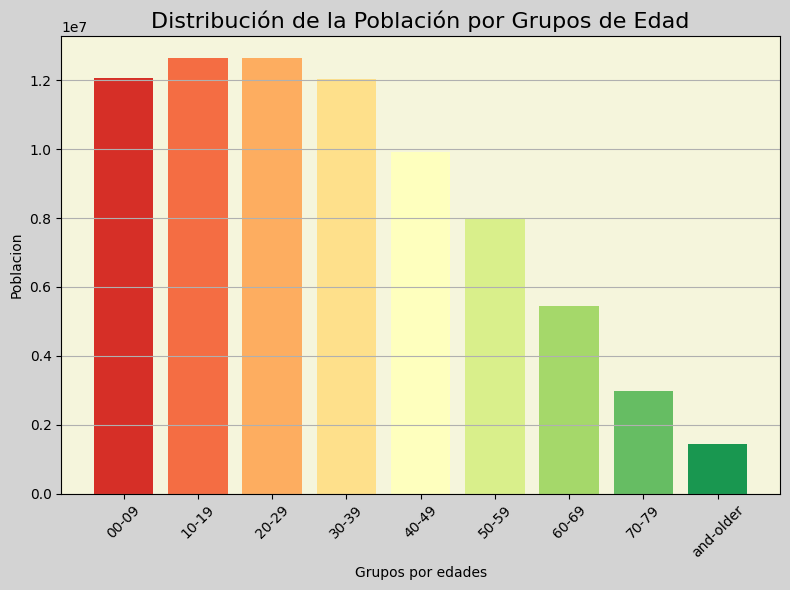

In [78]:
# Definimos los nombres de las columnas de grupos de edad
grupos_de_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29','population_age_30_39', 'population_age_40_49', 'population_age_50_59','population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# Calculamos el promedio de población por cada grupo de edad
promedio_por_grupo_de_edad = data_latinoamerica_nuevo[grupos_de_edad].mean()

# Definimos la paleta de colores con Seaborn
palette = sns.color_palette('RdYlGn', len(promedio_por_grupo_de_edad))

#Creamos la figura y los ejes para el gráfico
plt.figure(figsize=(8, 6))

# Creamos el gráfico de barras apiladas a partir de la serie y la variable anterior
bars = plt.bar(promedio_por_grupo_de_edad.index, promedio_por_grupo_de_edad, color=palette)
plt.gca().set_facecolor('beige')                                #Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                            #Establecemos el fondo alrededor del gráfico 

#Definimos el titulo del gráfico y de los ejes
plt.title('Distribución de la Población por Grupos de Edad',fontsize=16)
plt.xlabel('Grupos por edades')                                 #Titulo eje x
plt.ylabel('Poblacion')                                         #Titulo eje y
plt.xticks(range(len(grupos_de_edad)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in grupos_de_edad], rotation=45, ) #Personalizamos las etiquetas del eje x, creamos un rango para las posiciones de las etiquetas. Recortamos el nombre de las columnas a traves de col.split
plt.grid(axis='y')                                                  # Agregamos linea de cuadricula en el eje y
plt.tight_layout()                                                  #Ajustamos la relacion entre los elementos y el espacio

#Mostramos el gráfico
plt.show()

#con [col.split('_')[-2] + '-' + col.split('_')[-1] for col in grupos_de_edad] estoy creando una lista con for, con la posicion-2 y la -1 que estan concatenados


•	Mapa de calor de Métricas por país

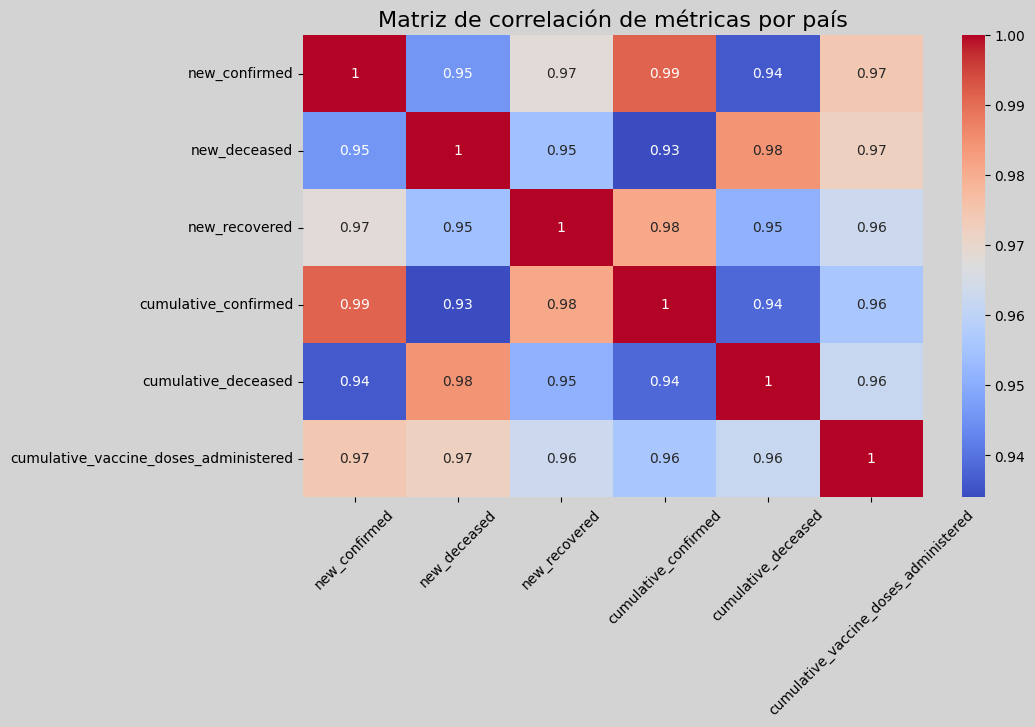

In [79]:
#Seleccionamos las metricas con las cuales trabajaremos
metricas_seleccionadas = ['new_confirmed', 'new_deceased', 'new_recovered','cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', ]

#Agrupamos los datos por país (con groupby) y calculamos el valor medio (con mean) de las métricas de la lista anterior
metricas_por_pais = data_latinoamerica_nuevo.groupby('country_name')[metricas_seleccionadas].mean()

#Calculamos la matriz de correlación para las métricas agrupadas
matriz_de_correlacion_metricas = metricas_por_pais.corr()

#Creamos la figura y los ejes para el mapa
plt.figure(figsize=(10, 6))

# Creamos el mapa de calor con la matriz de correlación armado y aplicamos la máscara
sns.heatmap(matriz_de_correlacion_metricas, annot=True, cmap='coolwarm')
plt.gcf().set_facecolor('lightgray')                            #Establecemos el fondo alrededor del gráfico 
plt.xticks(rotation=45)

#Definimos el titulo del gráfico
plt.title('Matriz de correlación de métricas por país', fontsize=16)

#Mostramos el gráfico
plt.show()        

•	Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

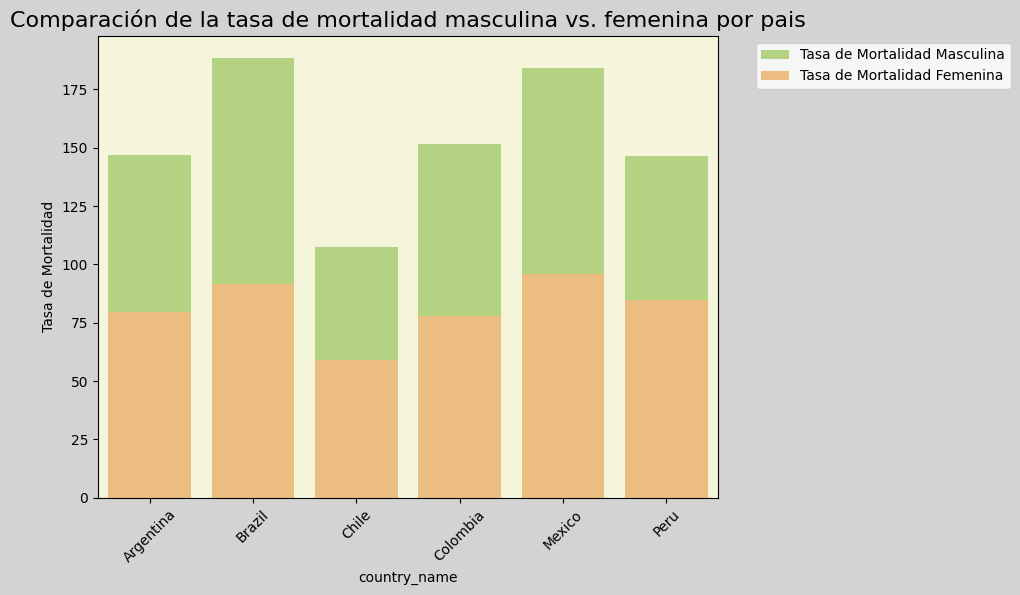

In [80]:
#Creamos la figura y los ejes el gráfico
plt.figure(figsize=(8, 6))

# Definimos la paleta de colores
palette = sns.color_palette('RdYlGn', 2)  # Dos colores, uno para cada barra (masculina y femenina)

#Creamos el grafico de barras
sns.barplot(data=data_latinoamerica_nuevo, x='country_name', y='adult_male_mortality_rate', label='Tasa de Mortalidad Masculina', color=palette[1])
sns.barplot(data=data_latinoamerica_nuevo, x='country_name', y='adult_female_mortality_rate', label='Tasa de Mortalidad Femenina',color=palette[0])
plt.gca().set_facecolor('beige')                                #Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                            #Establecemos el fondo alrededor del gráfico 

#Definimos el titulo del gráfico y de los ejes
plt. title('Comparación de la tasa de mortalidad masculina vs. femenina por pais',fontsize=16)
plt.xticks(rotation=45)                                         #Rotación de la etiqueta
plt. ylabel('Tasa de Mortalidad')                               #Titulo eje y

#Añadimos las etiquetas de los nombres de los paises_seleccionados
plt. legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Mostramos el gráfico
plt. show()

#Primero calculamos las tasas de mortalidad masculina y femenina por país. Luego, seleccionamos los países y las tasas de mortalidad correspondientes. 
#Finalmente, creamos un gráfico de barras apilado donde cada barra representa la tasa de mortalidad masculina y femenina para un país específico, y las barras se 
#apilan una encima de la otra. Esto nos permite comparar fácilmente las tasas de mortalidad entre hombres y mujeres para cada país.
#Observamos que la distribucion de los decesos es practicamente igual entre hombres y mujeres, quizas aumenta un poco mas en mujeres

•	Matriz de correlación de indicadores demográficos y de salud.

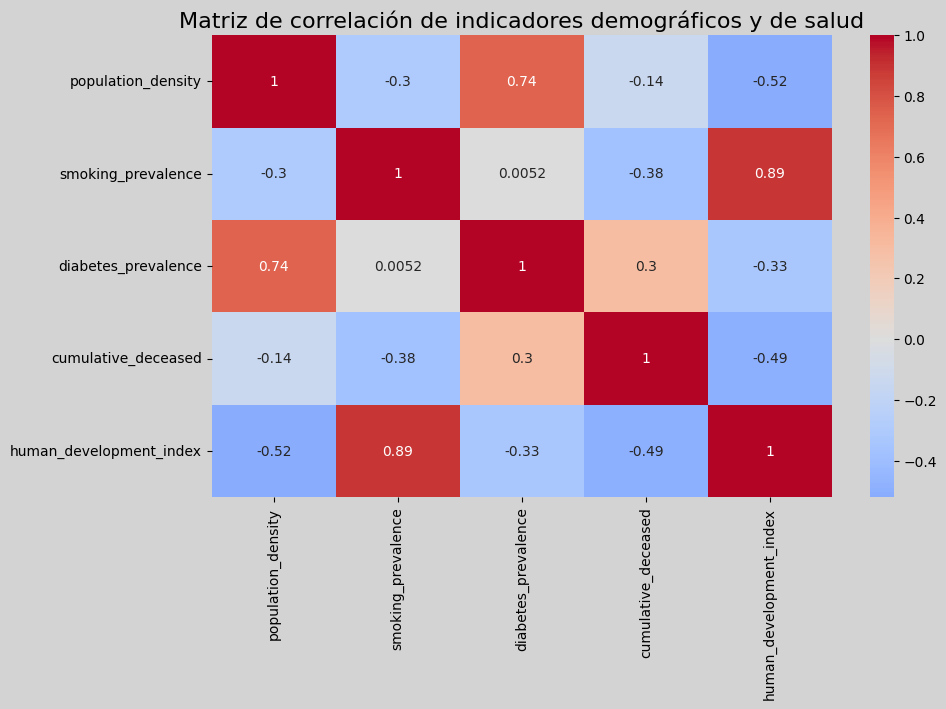

In [81]:
#Definir la lista de métricas
metricas_correlacion_indicadores = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']

#Agrupamos los datos por país a través de un groupby y calculamos el valor media de las métricas (a traves de mean)
metricas_por_pais = data_latinoamerica_nuevo.groupby('country_name')[metricas_correlacion_indicadores].mean()

#Calcular la matriz de correlación para las métricas agrupadas
correlacion_matriz_demograficos = metricas_por_pais.corr()

#Creamos la figura y los ejes el mapa de calor
plt.figure(figsize=(10, 6))

#Creamos el mapa de calor con la matriz de correlación y aplicar la máscara (correlacion_matriz_demograficos)
sns.heatmap(correlacion_matriz_demograficos, annot=True, cmap='coolwarm', center=0)
plt.gcf().set_facecolor('lightgray')                            #Establecemos el fondo alrededor del gráfico 

#Añadimos el título al gráfico
plt.title('Matriz de correlación de indicadores demográficos y de salud',fontsize=16)

#Mostramos el gráfico
plt.show()

#correlacion postiva (0,74) entre densidad de la poblacion y prevalencia de diabetes= mayor densidad lleva a mayor prevalencia de diabetes
#indice de desarrollo humano y prevalencia de tabaquismo con correlacion negativa de -0.52: paises con mayor indice de des hum tienen a tener menor prev de fumar
#prev de tabaquismo y decesos por covid tiene correlacion positiva de 0.89! importante porque sugiere que el tabaquismo es un factor de riesgo para la mortalidad por covid

•	Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

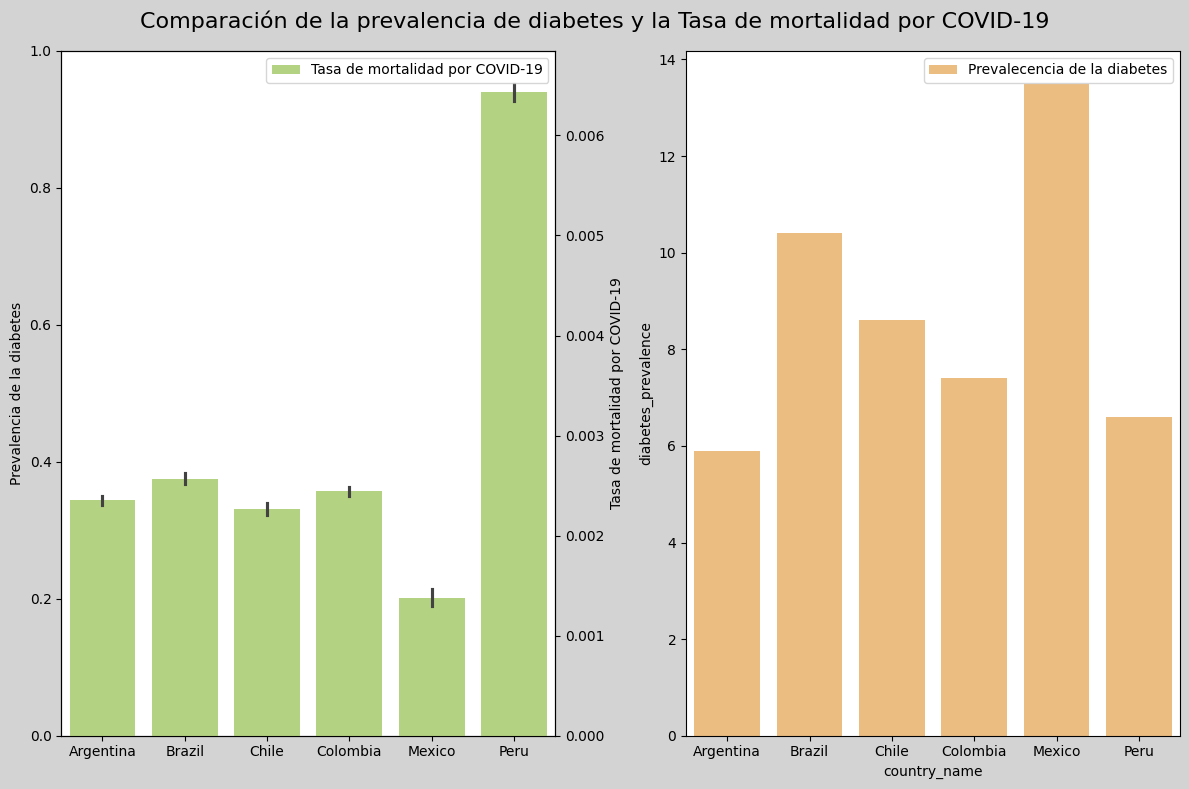

In [82]:
#Creamos una figura con dos subplots dispuestos uno al lado del otro
fig, (ax,ax2) = plt.subplots(1,2,figsize=(12,8))

# Definimos la paleta de colores
palette = sns.color_palette('RdYlGn',2)

sns.barplot(data=data_latinoamerica_nuevo, x=data_latinoamerica_nuevo['country_name'],y=data_latinoamerica_nuevo['diabetes_prevalence'], color=palette[0], label = 'Prevalecencia de la diabetes')
ax2 = ax.twinx ()
sns.barplot(data=data_latinoamerica_nuevo, x=data_latinoamerica_nuevo['country_name'],y=data_latinoamerica_nuevo['cumulative_deceased']/data_latinoamerica_nuevo['population'], color=palette[1], label = 'Tasa de mortalidad por COVID-19')
plt.gcf().set_facecolor('lightgray')                            #Establecemos el fondo alrededor del gráfico 


#Definimos el titulo del gráfico y de los ejes
fig.suptitle('Comparación de la prevalencia de diabetes y la Tasa de mortalidad por COVID-19',fontsize=16, ha='center')
plt.xticks(rotation=45)                                         #Rotación de la etiqueta
ax.set_ylabel('Prevalencia de la diabetes')                     #Titulo eje y
ax2.set_ylabel('Tasa de mortalidad por COVID-19')               #Titulo eje y 2
plt.tight_layout()

#Mostramos el gráfico
plt. show()

#Las dos enfermedades muestran un comportamiento similar en los paises seleccionados, pero se puede observar que la diabetes es la enfermedad que mas muerte ha causado en los paises estudiados
#observamos que Perú tiene la tasa más alta de mortalidad por covid, mientras que Mexico tiene la prevalencia de diabetes mas baja

•	Comparación de la Prevalencia por fumar y la Tasa de Mortalidad.

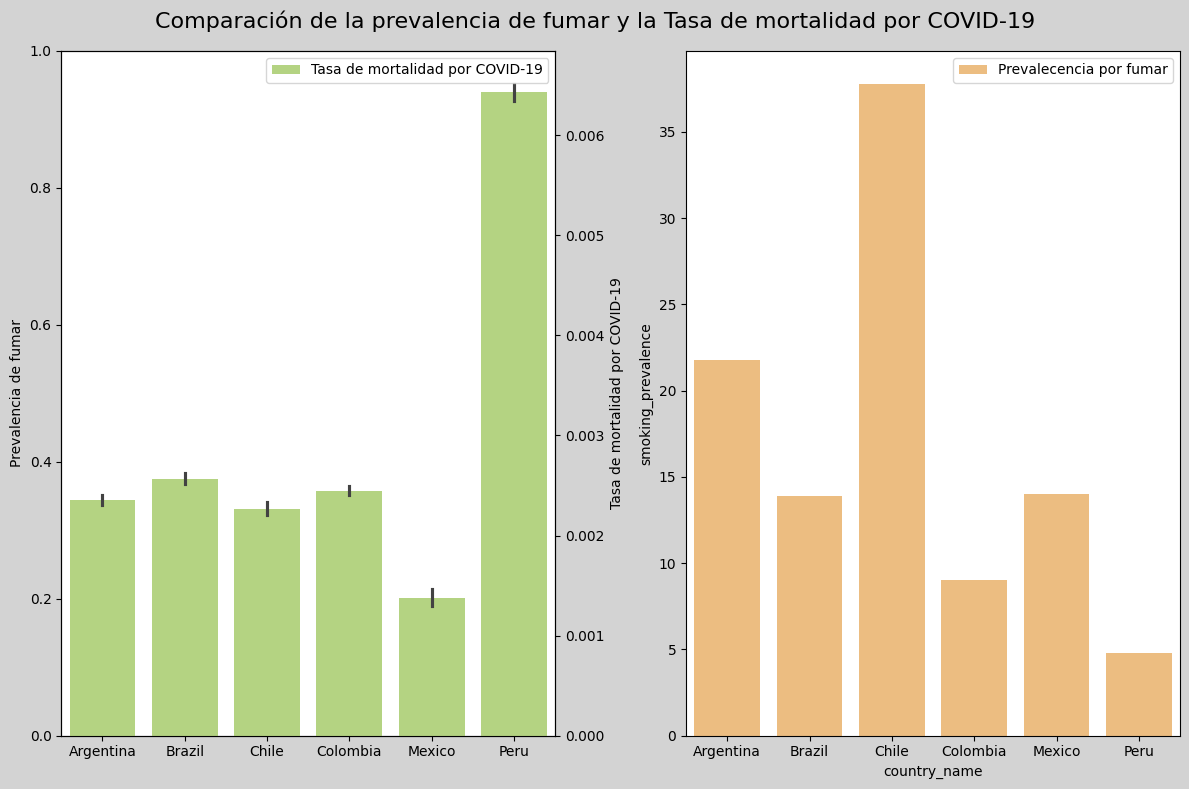

In [83]:
#Creamos una figura con dos subplots dispuestos uno al lado del otro
fig, (ax,ax2) = plt.subplots(1,2,figsize=(12,8))

# Definimos la paleta de colores
palette = sns.color_palette('RdYlGn',2)

sns.barplot(data=data_latinoamerica_nuevo, x=data_latinoamerica_nuevo['country_name'],y=data_latinoamerica_nuevo['smoking_prevalence'], color=palette[0], label = 'Prevalecencia por fumar')
ax2 = ax.twinx ()
sns.barplot(data=data_latinoamerica_nuevo, x=data_latinoamerica_nuevo['country_name'],y=data_latinoamerica_nuevo['cumulative_deceased']/data_latinoamerica_nuevo['population'], color=palette[1], label = 'Tasa de mortalidad por COVID-19')
plt.gcf().set_facecolor('lightgray')                            #Establecemos el fondo alrededor del gráfico 


#Definimos el titulo del gráfico y de los ejes
fig.suptitle('Comparación de la prevalencia de fumar y la Tasa de mortalidad por COVID-19',fontsize=16, ha='center')
plt.xticks(rotation=45)                                         #Rotación de la etiqueta
ax.set_ylabel('Prevalencia de fumar')                           #Titulo eje y
ax2.set_ylabel('Tasa de mortalidad por COVID-19')               #Titulo eje y 2
plt.tight_layout()

#Mostramos el gráfico
plt. show()

### **3. Avance 3: EDA con NumPy y Pandas**



##### Importación de librerias 
Por buenas prácticas, todas las librerias se importan desde la primera linea. Para este avance, además de las librerias usadas en los avances anteriores, importamos matplotlib.dates as mdates para visualizar de mejor forma las fechas de nuestras gráficas

In [26]:
#Lectura de nuestro dataset
data_latinoamerica_nuevo=pd.read_csv("DatosFinalesFiltrado.csv",sep=',')

In [27]:
#Recordamos que filtramos por paises seleccionados
paises_seleccionados=['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']

In [28]:
#Convertimos la columna Date en tipo de dato fecha
data_latinoamerica_nuevo['date'] = pd.to_datetime(data_latinoamerica_nuevo['date'])
data_latinoamerica_nuevo.set_index('date', inplace=True)   

#Verificamos el cambio realizado previamente
print(data_latinoamerica_nuevo.index.dtype)

datetime64[ns]


##### Análisis exploratorio detallado utilizando técnicas avanzadas de Pandas y Numpy

•	Evolución de Casos Activos vs. Recuperados

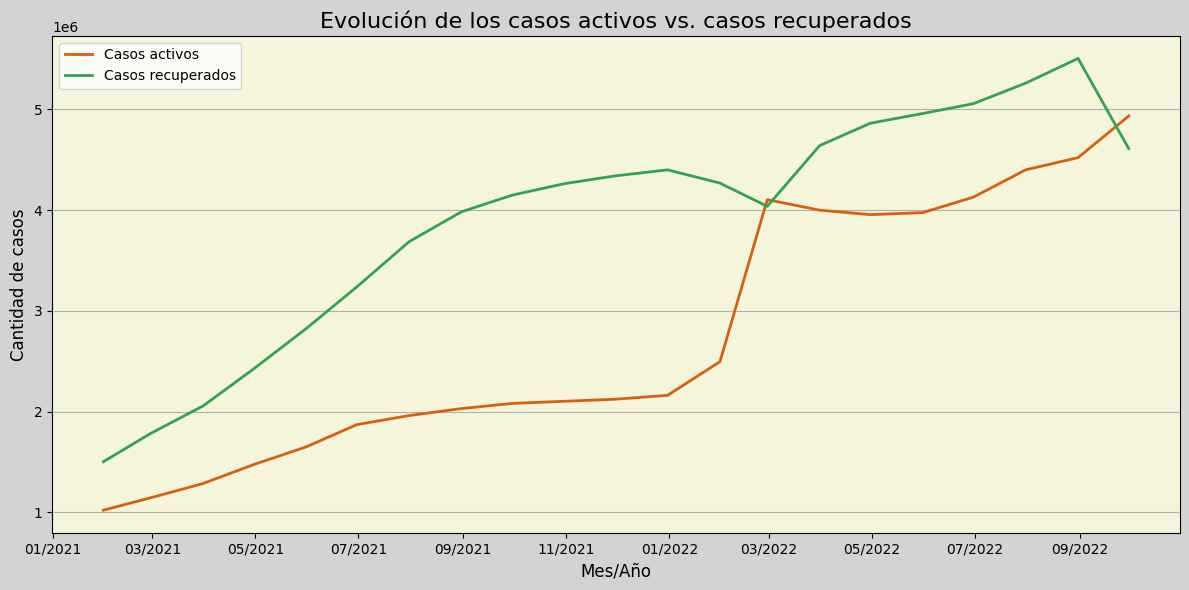

In [84]:
# Calcular los casos activos
data_latinoamerica_nuevo['casos_activos'] = data_latinoamerica_nuevo['cumulative_confirmed'] - data_latinoamerica_nuevo['cumulative_recovered'] - data_latinoamerica_nuevo['cumulative_deceased']

# Usamos resample para transformar la frecuencia hacia frecuencia mensual y calcular el valor medio de los valores numericos a traves de mean
datos_mensuales = data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True)

# Creamos la figura para el gráfico de lineas
plt.figure(figsize=(12, 6))  

# Creamos un gráfico de lineas 
plt.plot(datos_mensuales.index, datos_mensuales['casos_activos'], color='#d95f0e',label='Casos activos', linewidth=2 )
plt.plot(datos_mensuales.index, datos_mensuales['cumulative_recovered'], color='#31a354', label='Casos recuperados', linewidth=2)

#Vamos a formatear el eje x para mostrar MM/AAAA para una mejor visualización
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

#Personalizamos nuestra gráfica
plt.gca().set_facecolor('beige')                        # Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                    # Establecemos el fondo alrededor del gráfico 
plt.grid(axis='y')                                      # Agregamos lineas cuadriculas solo en el eje y

# Definimos el titulo del gráfico y de los ejes
plt.title('Evolución de los casos activos vs. casos recuperados', fontsize=16)
plt.xlabel('Mes/Año', fontsize=12)
plt.ylabel('Cantidad de casos', fontsize=12)
plt.legend()
plt.tight_layout()

# Mostramos el gráfico
plt.show()

#En un primer momento hay un aumento constante de casos activos y luego a partir de julio/2021 se estabiliza. A partir de marzo/2022 vuelven a subir los casos activos haciendo pico en agosto/2022 aprox y luego disminuye
#en el inicio, los casos recuperados tienen un crecimiento sostenido, luego se observa una desaceleracion (diciembre/2021)


•	Tasa de Crecimiento (%)

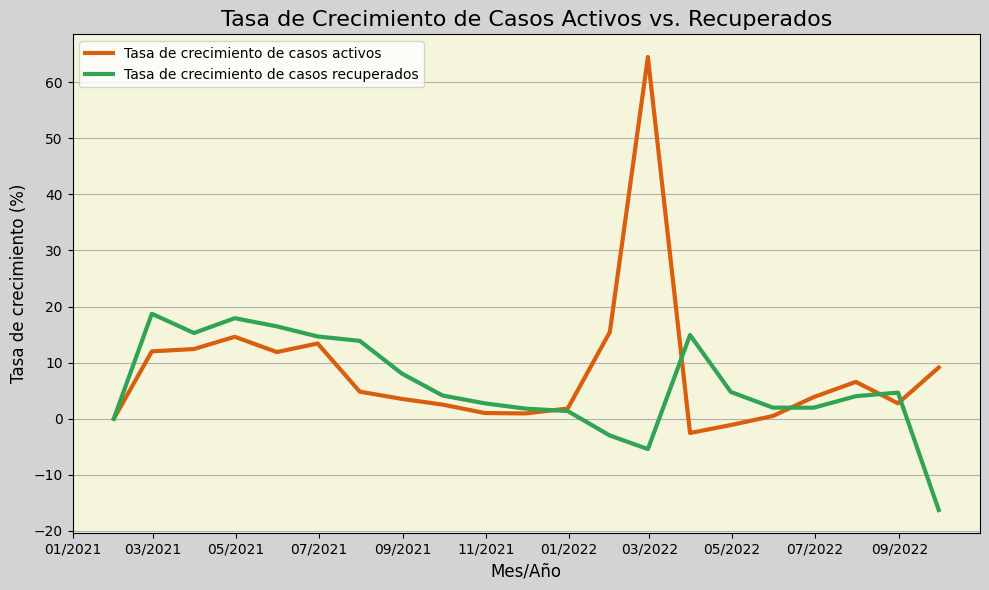

In [85]:
#Calculamos la tasa de crecimiento de casos activos y casos recuperados en forma de porcentaje
datos_mensuales['tasa_crecimiento_activos'] = ((datos_mensuales['casos_activos'].diff() / datos_mensuales['casos_activos'].shift()) * 100).fillna(0)
datos_mensuales['tasa_crecimiento_recuperados'] = ((datos_mensuales['cumulative_recovered'].diff() / datos_mensuales['cumulative_recovered'].shift()) * 100).fillna(0)

#Creamos la figura para el gráfico de lineas y la personalizamos
plt.figure(figsize=(10, 6))
plt.plot(datos_mensuales.index, datos_mensuales['tasa_crecimiento_activos'], color='#d95f0e', label='Tasa de crecimiento de casos activos', linewidth=3)
plt.plot(datos_mensuales.index, datos_mensuales['tasa_crecimiento_recuperados'], color='#31a354', label='Tasa de crecimiento de casos recuperados', linewidth=3)
plt.gca().set_facecolor('beige')                        # Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                    # Establecemos el fondo alrededor del gráfico 
plt.grid(axis='y')                                      # Agregamos lineas cuadriculas solo en el eje y

#Vamos a formatear el eje x para mostrar MM/AAAA para una mejor visualización
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

# Definimos el titulo del gráfico y de los ejes
plt.title('Tasa de Crecimiento de Casos Activos vs. Recuperados', fontsize=16)
plt.xlabel('Mes/Año', fontsize=12)
plt.ylabel('Tasa de crecimiento (%)', fontsize=12)
plt.legend()
plt.tight_layout()

# Mostramos el gráfico
plt.show() 
#La tasa de crecimiento de casos activos se encuentra en crecimiento (hasta despues del pico de marzo/2022), quizas se deba a brotes o cepas mas contagiosas
#La tasa de crecimiento de casos recuperados se inicia en crecmiento pero luego va en descenso hasta abril/2022.. posiblemente corresponde a los recuperados contagiados en el pico de la tasa de crecimiento de casos activos

•	Relación entre la Cobertura de Vacunación y la Reducción de Casos

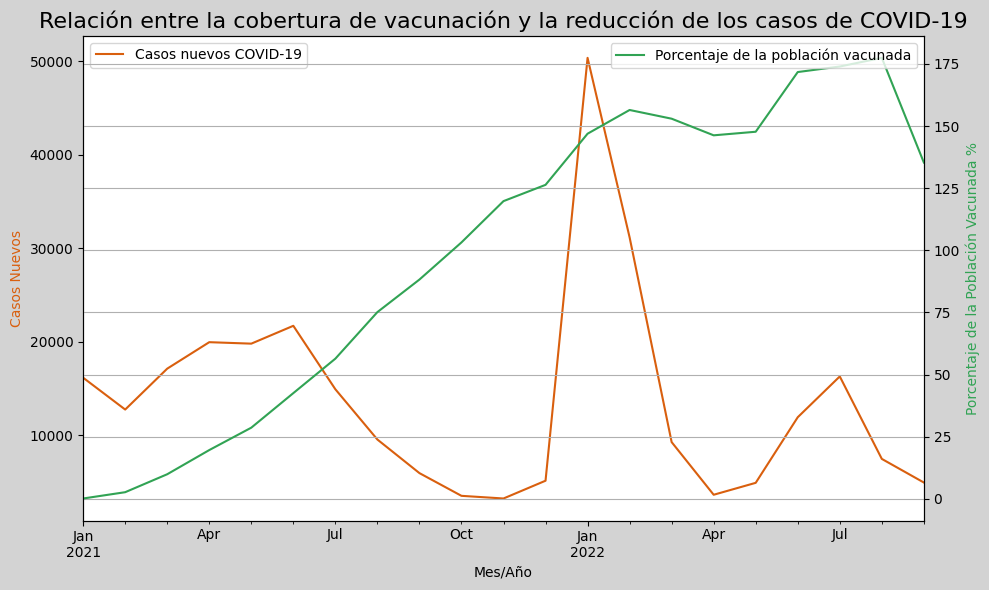

In [86]:
# Cálculamos el porcentaje de la población vacunada
data_latinoamerica_nuevo['porcentaje_vacunacion'] = (data_latinoamerica_nuevo['cumulative_vaccine_doses_administered'] / data_latinoamerica_nuevo['population']) * 100

#Creamos la figura para el gráfico de lineas y la personalizamos
plt.figure(figsize=(10, 6))  
ax1 = plt.gca()                         #Eje 1
ax2 = ax1.twinx()                       #Creamos otro eje (eje 2) que comparte el mismo eje x con el eje 1

# Graficamos los nuevos casos de COVID-19 y el porcentaje de la población vacunada, usamos resample para modificar la frecuencia hacia frecuencia mensual
data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='#d95f0e', label='Casos nuevos COVID-19')
data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True)['porcentaje_vacunacion'].plot(ax=ax2, color='#31a354', label='Porcentaje de la población vacunada')
plt.gcf().set_facecolor('lightgray')                            #Establecemos el fondo alrededor del gráfico 
plt.grid(axis='y')                                              #Agregamos lineas cuadriculas solo en el eje y

#Colocamos el título del gráfico Y etiquetas de los ejes
plt.title('Relación entre la cobertura de vacunación y la reducción de los casos de COVID-19', fontsize=16)
ax1.set_xlabel('Mes/Año')                                                        #Titulo eje x
ax1.set_ylabel('Casos Nuevos', color='#d95f0e')                                  #Titulo eje y (color naranja)
ax2.set_ylabel('Porcentaje de la Población Vacunada %', color='#31a354')         #Titulo eje y 2 (color verde)
plt.tight_layout()                                                              #Para evitar la superposición
ax1.legend(loc='upper left')                                                    #Ubicacion de la leyenda 'Casos nuevos COVID-19'
ax2.legend(loc='upper right')                                                   #Ubicacion de la leyenda '% de poblacion vacunada'

# Mostramos el gráfico
plt.show()

#por la variable de casos nuevos, se observa un aumento inicial, con varios picos y caidas y un pico record de contagios en enero/2022(recordar que es verano, estan las fiestas y vacaciones) seguido de una fuerte disminucion
#en cuanto al % de la poblacion vacunada, vemos un crecimiento constante fruto de los esquemas de vacunacion de cada pais, incluso una estabilizacion de la curva

- Progreso de la vacunación por país

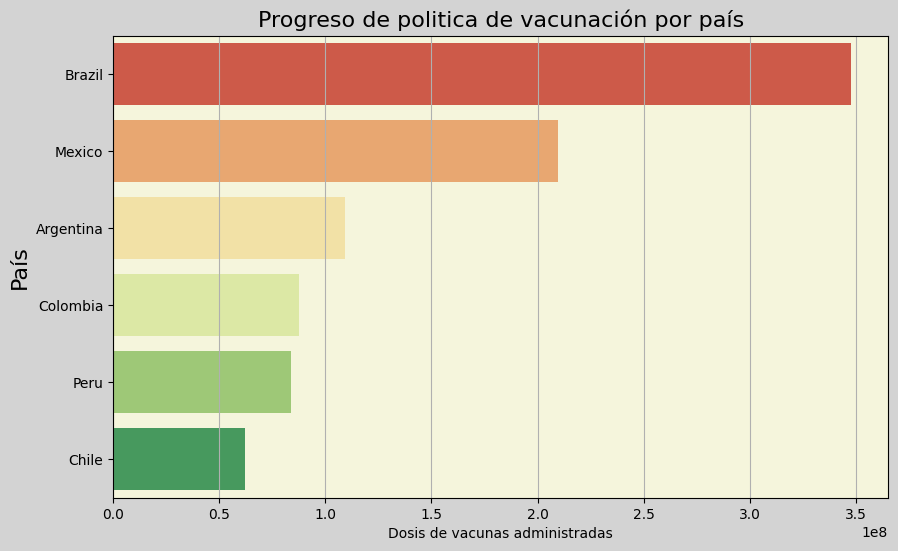

In [87]:
# Agrupamos los datos por país (con un groupby) y calcular el máximo (max) de dosis de vacunas administradas acumuladas por país
progreso_vacunacion = data_latinoamerica_nuevo.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

#Creamos figura para el gráfico de barras horizontal
plt.figure(figsize=(10, 6))

# El argumento 'hue' se utiliza para asignar colores diferentes a cada barra basada en el país

#Definimos un grafico de barras horizontal, donde los valores del eje x es la cantidad de dosis, el eje y esta por nombre de paìs
sns.barplot(x=progreso_vacunacion.values, y=progreso_vacunacion.index, hue=progreso_vacunacion.index,palette= 'RdYlGn')
plt.gca().set_facecolor('beige')                                #Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                            #Establecemos el fondo alrededor del gráfico 
plt.grid(axis='x') 

# Añadir un título al gráfico y a los ejes
plt.title('Progreso de politica de vacunación por país', fontsize=16)
plt.ylabel('País', fontsize=16)                                      #Titulo eje x
plt.xlabel('Dosis de vacunas administradas')                        #Titulo eje x


# Mostrar el gráfico
plt.show()

#Brazil lidera la distribucion de dosis, considerar que es uno de los paises mas afectados por el virus y tambien el que posee mayor poblacion

•	Nuevos casos y temperatura promedio

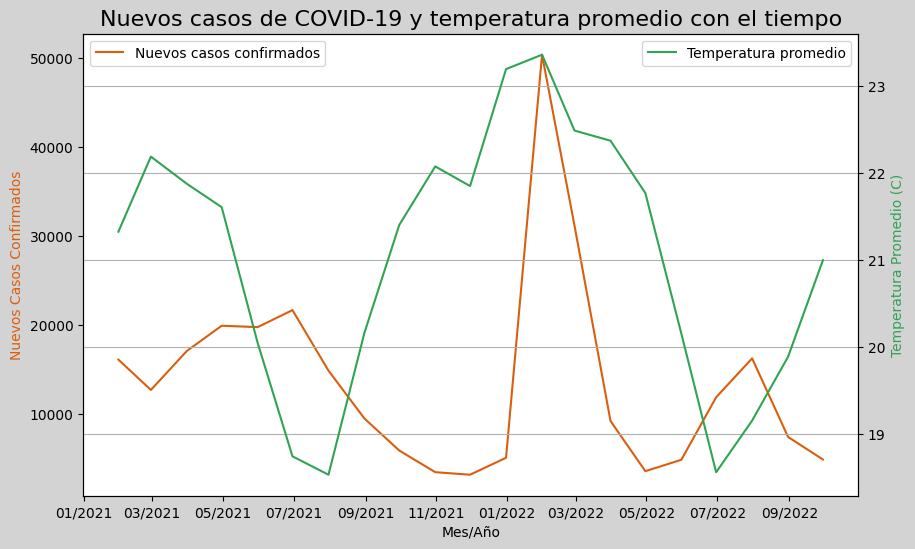

In [88]:
#Creamos figura para el gráfico y definimos los ejes
plt.figure(figsize=(10,6))     
ax1 = plt.gca()                 #generamos una grafica en el primer ax
ax2 = ax1.twinx()               #generamos una segunda grafica que comparte el mismo eje x que ax1 (al final resulta en una superposicion para comparar dos variables)


# Graficamos los datos de los nuevos casos confirmados en ax1
ax1.plot(data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True).index, data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True) ['new_confirmed'], color='#d95f0e', label='Nuevos casos confirmados')

# Graficamos la temperatura media en el eje ax2, resample para modifiar la frecuencia a mensual
ax2.plot(data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True).index, data_latinoamerica_nuevo.resample('ME').mean(numeric_only=True) ['average_temperature_celsius'], color='#31a354', label='Temperatura promedio')

#Vamos a formatear el eje x para mostrar MM/AAAA para una mejor visualización
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

#Personalizamos nuestra grafica con titulo y nombre a los ejes
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo', fontsize=16)
ax1.set_xlabel('Mes/Año')                                       #Titulo del eje x
ax1.set_ylabel('Nuevos Casos Confirmados', color='#d95f0e')     #Titulo del eje y (naranja)
ax2.set_ylabel('Temperatura Promedio (C)', color='#31a354')     #Titulo del eje y (verde)
ax1. legend(loc='upper left')                                   # Mostramos la leyenda para el primer conjunto de ejes en la esquina superior izquierda
ax2. legend(loc='upper right')                                  # Mostramos la leyenda para el segundo conjunto de ejes en la esquina superior derecha
plt.gcf().set_facecolor('lightgray')                            #Fondo alrededor del gráfico
plt.grid(axis='y')                                              #Lineas cuadriculas solo en el eje y

#Mostramos el grafico
plt.show()

#vemos una relacion inversa entre las dos variables, es decir a mayor temperatura hay menos casos nuevos, excepto entre enero/2022 y marzo/2022 aprox, lo cual se puede deber al verano, las vacaciones y las fiestas

•	Impacto de la Urbanización en la Propagación del Covid-19

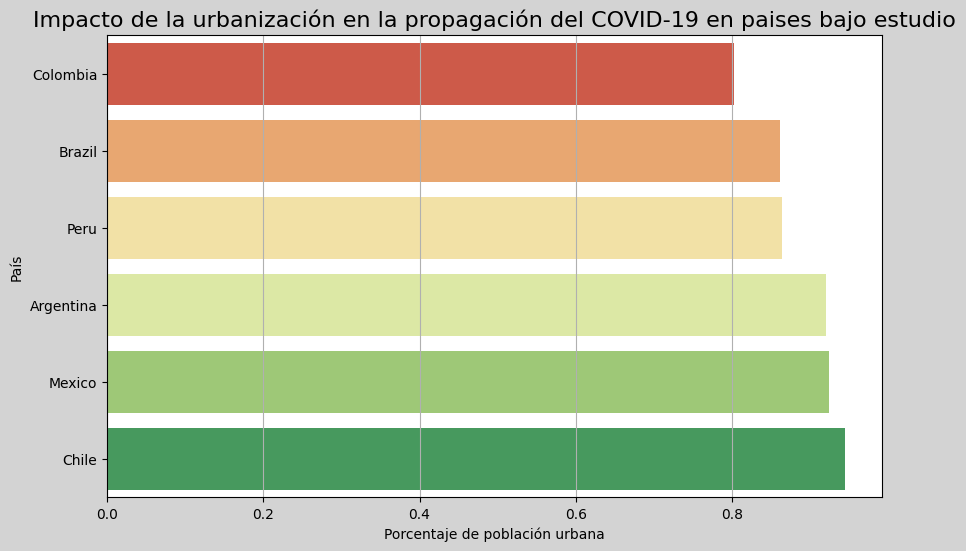

In [89]:
# Calculamos el porcentaje de población urbana para cada país
data_latinoamerica_nuevo['urban_population_percentage'] = data_latinoamerica_nuevo['population_urban'] / data_latinoamerica_nuevo['population']

# Agrupamos los datos por país (con groupby) y seleccionamos el último registro de cada país (last, porque la poblacion es una constate), que contiene los datos más recientes
casos_urbanos = data_latinoamerica_nuevo.groupby('country_name').last().sort_values(by='urban_population_percentage')

# Creamos una figura para el gráfico de barras
plt.figure(figsize=(10, 6))

# Definimos un gráfico de barras, donde x=porcentaje de población urbana y y representa el país
sns.barplot(x=casos_urbanos['urban_population_percentage'], y=casos_urbanos.index, hue=casos_urbanos.index, palette='RdYlGn' )
plt.gcf().set_facecolor('lightgray')                            #Fondo alrededor del gráfico
plt.grid(axis='x')                                              #Lineas en el eje x

#Personalizamos con titulo de grafico y los ejes
plt.title('Impacto de la urbanización en la propagación del COVID-19 en paises bajo estudio', fontsize = 16)
plt.xlabel('Porcentaje de población urbana')                        #Titulo eje x
plt.ylabel('País')                                                   #Titulo eje x


# Mostramos el gráfico
plt.show()

•	Evolución Semanal de Casos Nuevos

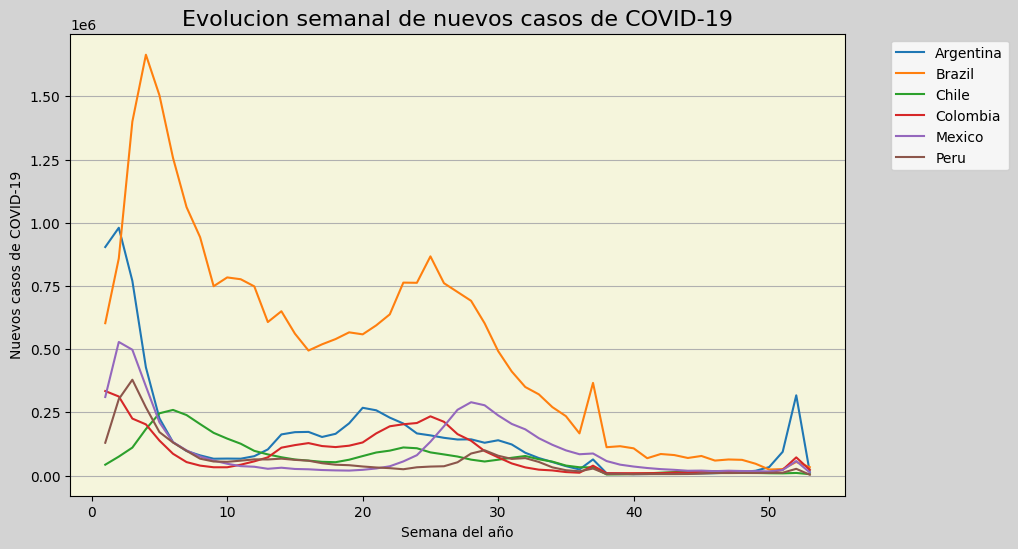

In [90]:
#Debemos añadir la columna 'semana' usando el índice de fecha a traves de isocalendar
data_latinoamerica_nuevo['semana'] = data_latinoamerica_nuevo.index.isocalendar().week

#Agrupamos los datos por 'country_name' y 'mes'(a groupby le pasamos 2 columnas como condiciones) y sumamos los casos nuevos confirmados para cada semana
casos_semanales = data_latinoamerica_nuevo.groupby(['country_name', 'semana']) ['new_confirmed'].sum().reset_index()      

#Definimos la figura para crear nuestro grafico
plt.figure(figsize=(10, 6))        
#Con un ciclo for, iteramos sobre cada pais unico
for pais_evolucion in casos_semanales['country_name'].unique():  
    casos_semanales_por_pais = casos_semanales[casos_semanales['country_name'] == pais_evolucion]                   # Filtramos los datos para el país actual
    plt.plot(casos_semanales_por_pais['semana'], casos_semanales_por_pais['new_confirmed'], label=pais_evolucion)    # Cada vez que entra en ciclo y cumple la condicion, grafica los casos nuevos confirmados por semana por pais
plt.gca().set_facecolor('beige')                                        # Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                                    #Fondo alrededor del gráfico
plt.grid(axis='y')                                                       #Lineas cuadriculas en el eje x  

#Personalizamos nuestro gráfico    
plt.title('Evolucion semanal de nuevos casos de COVID-19', fontsize=16)  
plt.xlabel('Semana del año')                                            #Titulo eje x
plt.ylabel('Nuevos casos de COVID-19')                                  #Titulo eje y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')                  # Añadir la leyenda fuera del gráfico, a la derecha


# Mostramos el gráfico  
plt.show()    

#nuevamente Brazil lidera la evolucion semanal de nuevos casos, sobre todo en las primeras semanas del año, considerando que es verano y un gran % de la poblacion se encuentra de vacaciones en verano

•	Evolución Anual de Casos Nuevos

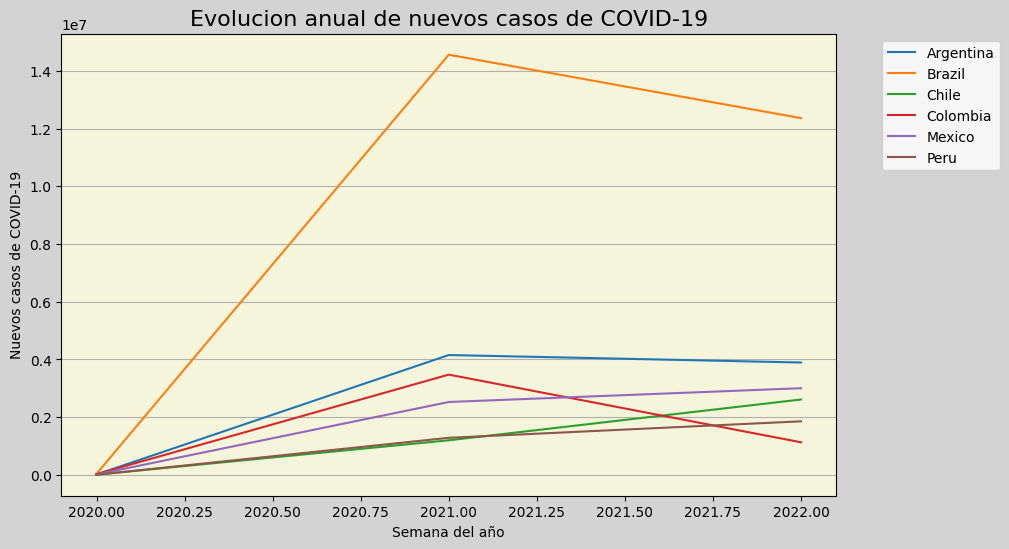

In [60]:
#Debemos añadir la columna 'año' usando el índice de fecha a traves de isocalendar
data_latinoamerica_nuevo['año'] = data_latinoamerica_nuevo.index.isocalendar().year

#Agrupamos los datos por 'country_name' y 'año'(a groupby le pasamos 2 columnas como condiciones) y sumamos los casos nuevos confirmados para cada año
casos_anuales_iso = data_latinoamerica_nuevo.groupby(['country_name', 'año']) ['new_confirmed'].sum().reset_index()      

#Definimos la figura para crear nuestro grafico
plt.figure(figsize=(10, 6))        
#Con un ciclo for, iteramos sobre cada pais unico
for pais_evolucion_anual in casos_anuales_iso['country_name'].unique():  
    casos_anuales_por_pais = casos_anuales_iso[casos_anuales_iso['country_name'] == pais_evolucion_anual]                   # Filtramos los datos para el país actual
    plt.plot(casos_anuales_por_pais['año'], casos_anuales_por_pais['new_confirmed'], label=pais_evolucion_anual)    # Cada vez que entra en ciclo y cumple la condicion, grafica los casos nuevos confirmados por semana por pais
plt.gca().set_facecolor('beige')                                        # Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                                    #Fondo alrededor del gráfico
plt.grid(axis='y')                                                       #Lineas cuadriculas en el eje x  

#Personalizamos nuestro gráfico    
plt.title('Evolucion anual de nuevos casos de COVID-19', fontsize=16)  
plt.xlabel('Semana del año')                                            #Titulo eje x
plt.ylabel('Nuevos casos de COVID-19')                                  #Titulo eje y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')                  # Añadir la leyenda fuera del gráfico, a la derecha


# Mostramos el gráfico  
plt.show()   

•	Distribución de la Población por Edad en Países

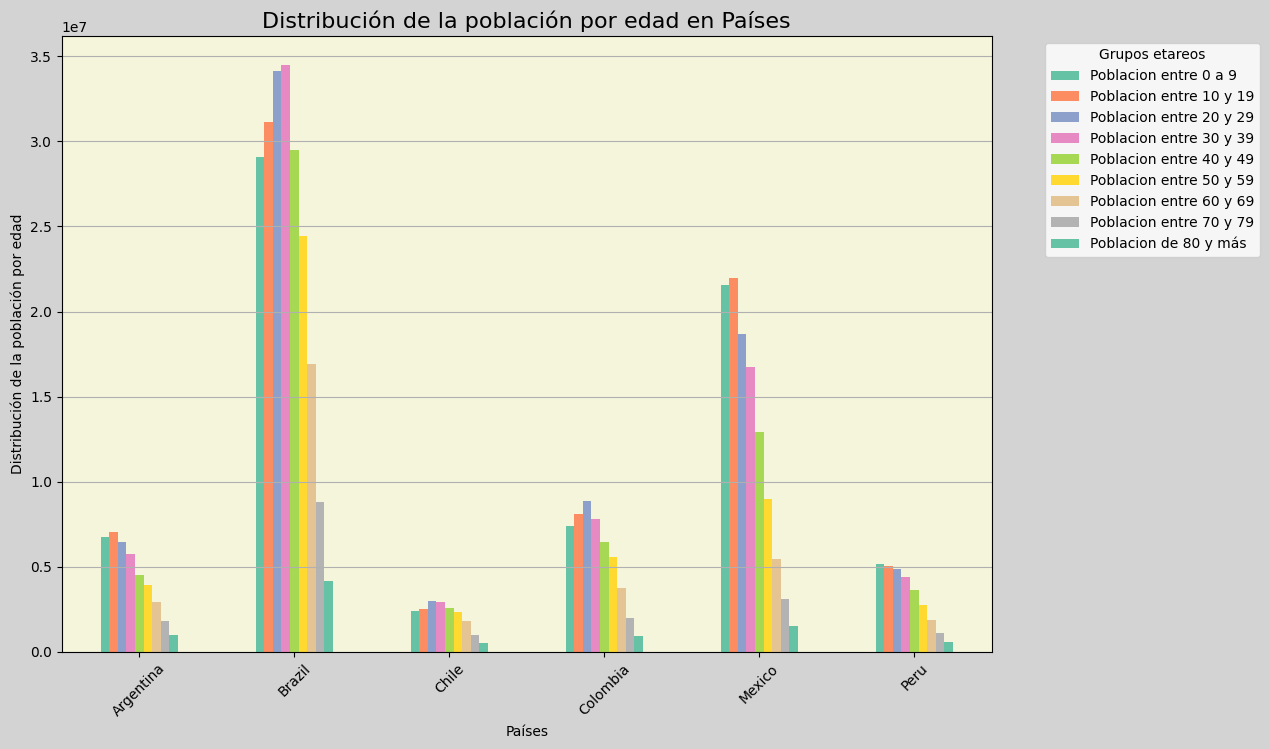

In [69]:
# Definimos los grupos de edad (reutilizo una lista antes definida)
grupos_de_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

#Agrupamos los datos por 'country_name'  y calculamos el valor medio de cada elemento de grupos_de_edad
etario_distribucion= data_latinoamerica_nuevo.groupby('country_name')[grupos_de_edad].mean()

# Definimos la paleta de colores para esta grafica
palette = sns.color_palette('Set2', len(grupos_de_edad))

#Definimos la figura para crear nuestro grafico de barras
etario_distribucion.plot(kind='bar', stacked=False, figsize=(12, 8), color=palette)
plt.gca().set_facecolor('beige')                                        # Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                                    #Fondo alrededor del gráfico
plt.grid(axis='y')                                                      #Lineas cuadriculas en el eje y  

#Personalizamos el titulo, ejes y leyenda
plt.title('Distribución de la población por edad en Países', fontsize=16)
plt.xlabel('Países')                                                    #Titulo eje x
plt.ylabel('Distribución de la población por edad')                     #Titulo eje y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Grupos etareos',labels=['Poblacion entre 0 a 9', 'Poblacion entre 10 y 19', 'Poblacion entre 20 y 29', 'Poblacion entre 30 y 39', 'Poblacion entre 40 y 49', 'Poblacion entre 50 y 59', 'Poblacion entre 60 y 69', 'Poblacion entre 70 y 79', 'Poblacion de 80 y más'] )
plt.xticks(rotation=45)                                                 #Rotación de etiqueta

# Mostramos el gráfico
plt.show()

•	Comparación de Estrategias de Vacunación en América Latina

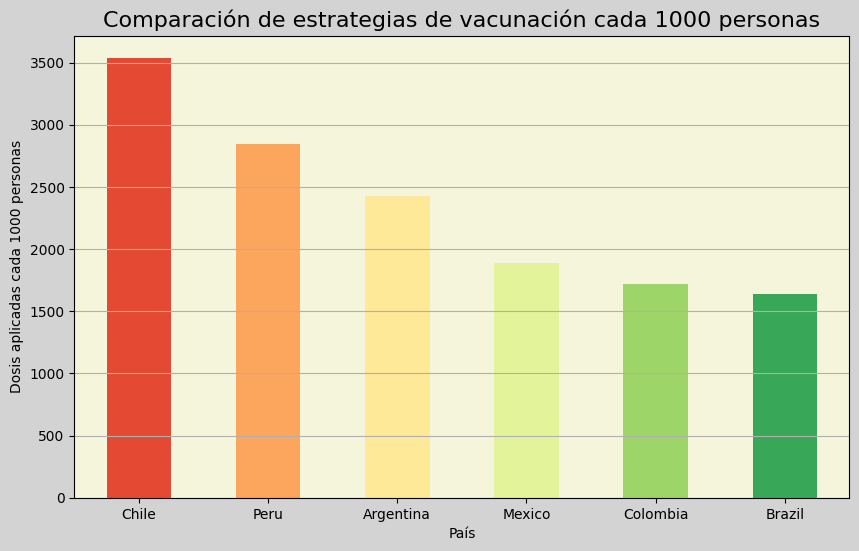

In [79]:
# Calculamos el % de dosis de vacunas administradas por cada 1000 personas en cada país. A traves de un groupby 
# agrupamos por pais y calculamos el maximo de cumulative_vaccine_doses_administered y lo dividimos por el max de la poblacion; luego *1000
estrategia_vacunacion = data_latinoamerica_nuevo.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_nuevo.groupby('country_name')['population'].max() * 1000

# Ordenamos los países de forma descendente de acuerdo al % de vacunas administradas cada 1000 personas
plan_vacunacion = estrategia_vacunacion.sort_values(ascending=False)

# Definimos una paleta de colores 
palette = sns.color_palette('RdYlGn', len(plan_vacunacion))

# Creamos el gráfico de barras
ax = plan_vacunacion.plot(kind='bar', figsize=(10, 6), color=palette)
plt.gca().set_facecolor('beige')                                        # Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                                    #Fondo alrededor del gráfico
plt.grid(axis='y')                                                      #Lineas cuadriculas en el eje y

#Personalizamos nuestro grafico
plt.title('Comparación de estrategias de vacunación cada 1000 personas', fontsize=16)
plt.xlabel('País')                                              #Titulo eje x
plt.ylabel('Dosis aplicadas cada 1000 personas')                #Titulo eje y
plt.xticks(rotation=0)

# Mostramos el gráfico 
plt.show()  

#Chile lidera la campaña de vacunacion cada 1000 personas, recordando que tenia la menor cantidad de poblacion y el PBI per capita mas alto entre los paises del estudio.
#Brazil posee la mayor cantidad de poblacion, por esa razon es normal que tenga este comportamiento

•	Evolución del Número de Muertes Diarias.

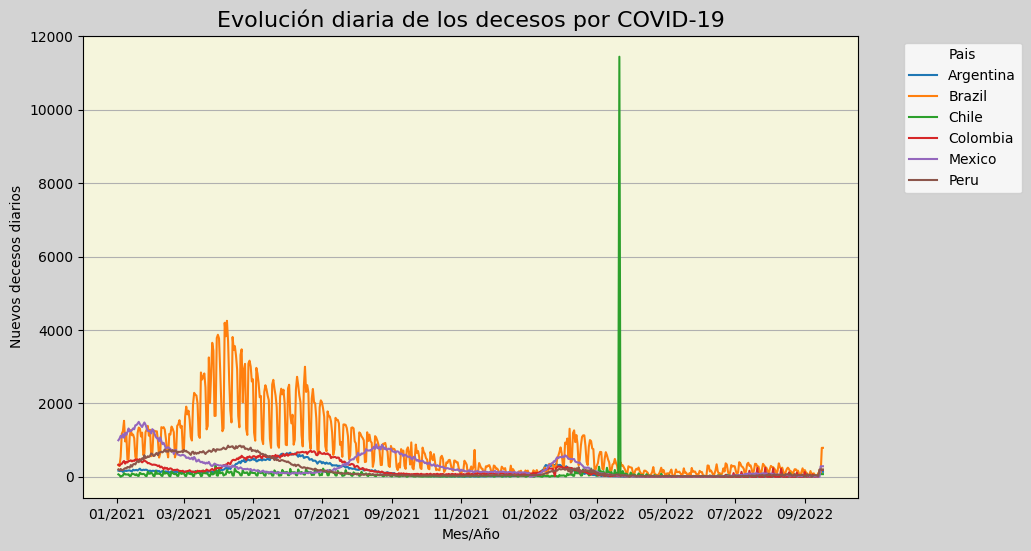

In [98]:
#Creamos el gráfico de lineas y definimos su tamaño
plt.figure(figsize=(10,6)) 

# Definimos una paleta de colores 
palette = sns.color_palette('RdYlGn')

#Vamos a formatear el eje x para mostrar MM/AAAA para una mejor visualización (no lo hacemos por dia, sino por mes/año para mejorar el analisis)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

# Creamos el gráfico de lineas, donde definimos el df a usar, las columnas para los ejes x e y, hue para cada country_name, y nuestra paleta de colores)
sns.lineplot(data=data_latinoamerica_nuevo, x='date', y='new_deceased', hue='country_name', color=palette)
plt.gca().set_facecolor('beige')                                        # Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                                    #Fondo alrededor del gráfico
plt.grid(axis='y')                                                      #Lineas cuadriculas en el eje y

#Personalizamos nuestro grafico
plt.title('Evolución diaria de los decesos por COVID-19', fontsize=16)
plt.xlabel('Mes/Año')                                                   #Titulo del eje X
plt.ylabel('Nuevos decesos diarios')                                    #Titulo del eje X
#Personalizamos la leyenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Pais')
#Mostramos el gráfico
plt.show()

#Ya habiamos detectado un numero atipico en Chile

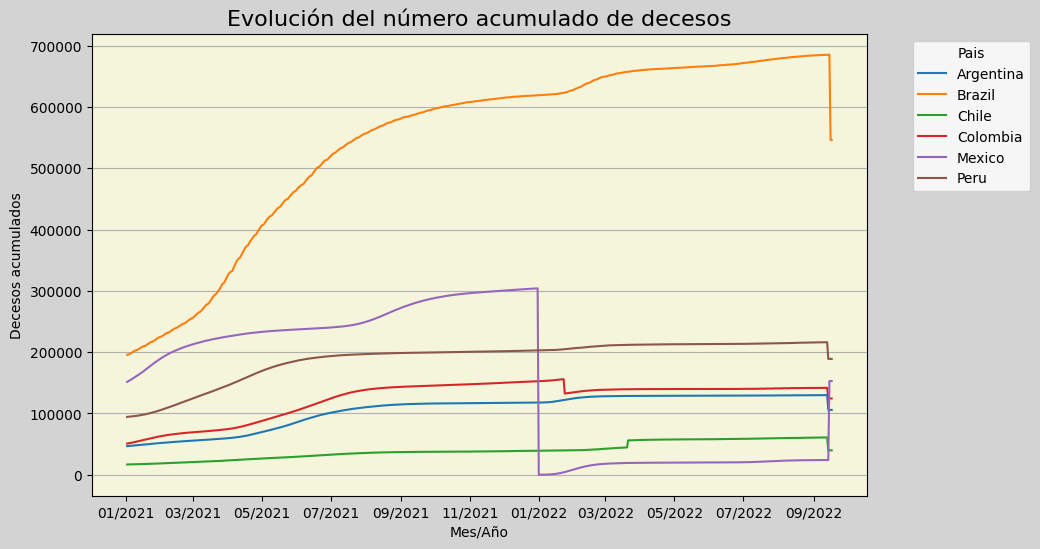

In [99]:
#EVOLUCION DEL NUMERO ACUMULADO DE DECESOS 
#Creamos el gráfico de lineas y definimos su tamaño
plt.figure(figsize=(10,6))  

# Definimos una paleta de colores 
palette = sns.color_palette('RdYlGn')

#Vamos a formatear el eje x para mostrar MM/AAAA para una mejor visualización 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

# Creamos el gráfico de lineas, el df a usar, las columnas para los ejes x e y, hue para cada country_name, y nuestra paleta de colores)
sns.lineplot(data=data_latinoamerica_nuevo, x='date', y='cumulative_deceased', hue='country_name', color=palette)
plt.gca().set_facecolor('beige')                                        # Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                                    #Fondo alrededor del gráfico
plt.grid(axis='y')                                                      #Lineas cuadriculas en el eje y

#Personalizamos el grafico
plt.title('Evolución del número acumulado de decesos', fontsize=16)  
plt.xlabel('Mes/Año')                                                   #Titulo eje X
plt.ylabel('Decesos acumulados')                                        #Titulo eje X
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Pais')       #Personalizamos la leyenda


# Mostramos el gráfico
plt.show() 

#Brazil es de los pais mas afectados por la pandemia, seguido por Mexico y Colombia (lo vimos reflejado en la distribucion de la estrategia de vacunacion)
#Recordar que cae al final porque nuestro analisis llega a esa fecha y hicimos un tratamiento con 0 en nulls por la imposibilidad de recuperar esa informacion

•	Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

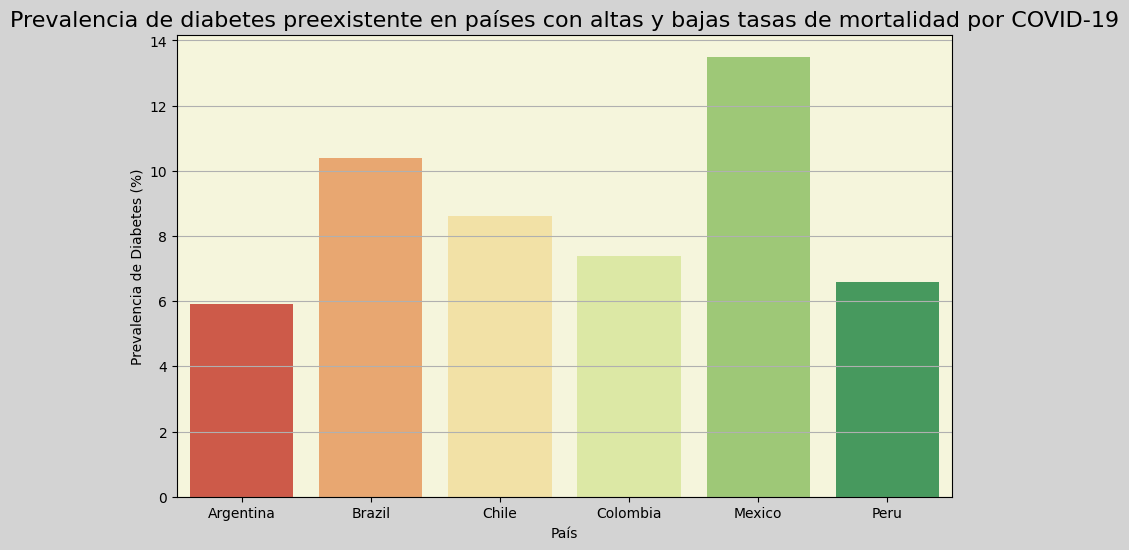

<Figure size 1000x600 with 0 Axes>

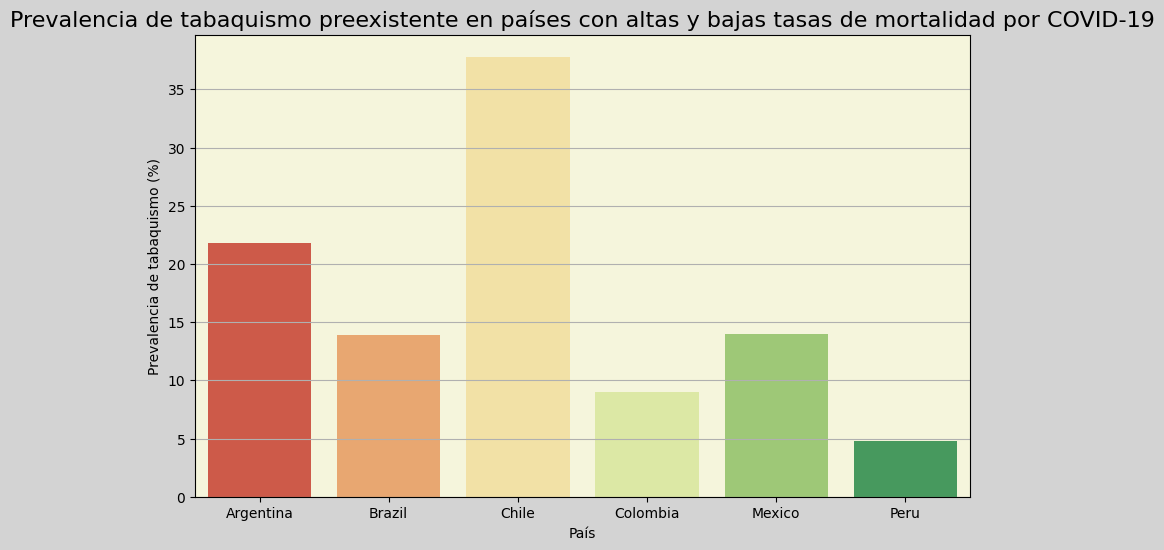

In [104]:
#Calculamos los países con las mayores y menores tasas de mortalidad acumulada
mayores_mortalidad = data_latinoamerica_nuevo.groupby('country_name')['cumulative_deceased'].max().nlargest().index
menores_mortalidad = data_latinoamerica_nuevo.groupby('country_name')['cumulative_deceased'].max().nsmallest().index

# Filtrar los datos para incluir solo los países en las listas de mayores y menores tasas de mortalidad
preexistentes_mortalidad = data_latinoamerica_nuevo[data_latinoamerica_nuevo['country_name'].isin(mayores_mortalidad.union(menores_mortalidad))] #join

#PREVALECENCIA DE LA DIABETES
#Definimos el tamaño para la figura de la prevalencia de diabetes
plt.figure(figsize=(10, 6))  

# Definimos una paleta de colores 
palette = sns.color_palette('RdYlGn')

#Creamos nuestro grafico para mostrar la prevalencia de condiciones preexistentes(diabetes) y las tasas de mortalidad
ax = sns.barplot(data=preexistentes_mortalidad, x='country_name', y='diabetes_prevalence', hue='country_name', palette=palette)
plt.gca().set_facecolor('beige')                                        # Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                                    #Fondo alrededor del gráfico
plt.grid(axis='y')                                                      #Lineas cuadriculas en el eje y

#Personalizamos nuestro grafico
plt.title('Prevalencia de diabetes preexistente en países con altas y bajas tasas de mortalidad por COVID-19', fontsize=16)
plt.xlabel('País')                                          #Titulo eje x
plt.ylabel('Prevalencia de Diabetes (%)')                   #Titulo eje y

# Mostramos el gráfico
plt.show()

#PREVALECENCIA DEL TABAQUISMO
#Definimos el tamaño para la figura de la prevalencia deL TABAQUISMO
plt.figure(figsize=(10, 6))  

# Definimos una paleta de colores 
palette = sns.color_palette('RdYlGn')

#Creamos nuestro grafico para mostrar la prevalencia de condiciones preexistentes(tabaquismo) y las tasas de mortalidad
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(data=preexistentes_mortalidad, x='country_name', y='smoking_prevalence', hue='country_name', palette=palette)
plt.gca().set_facecolor('beige')                                        # Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                                    #Fondo alrededor del gráfico
plt.grid(axis='y')                                                      #Lineas cuadriculas en el eje y

#Personalizamos nuestro grafico
plt.title('Prevalencia de tabaquismo preexistente en países con altas y bajas tasas de mortalidad por COVID-19', fontsize=16)
plt.xlabel('País')                                          #Titulo eje x
plt.ylabel('Prevalencia de tabaquismo (%)')                   #Titulo eje y

# Mostramos el gráfico
plt.show()

•	Variación Mensual de Casos y Muertes

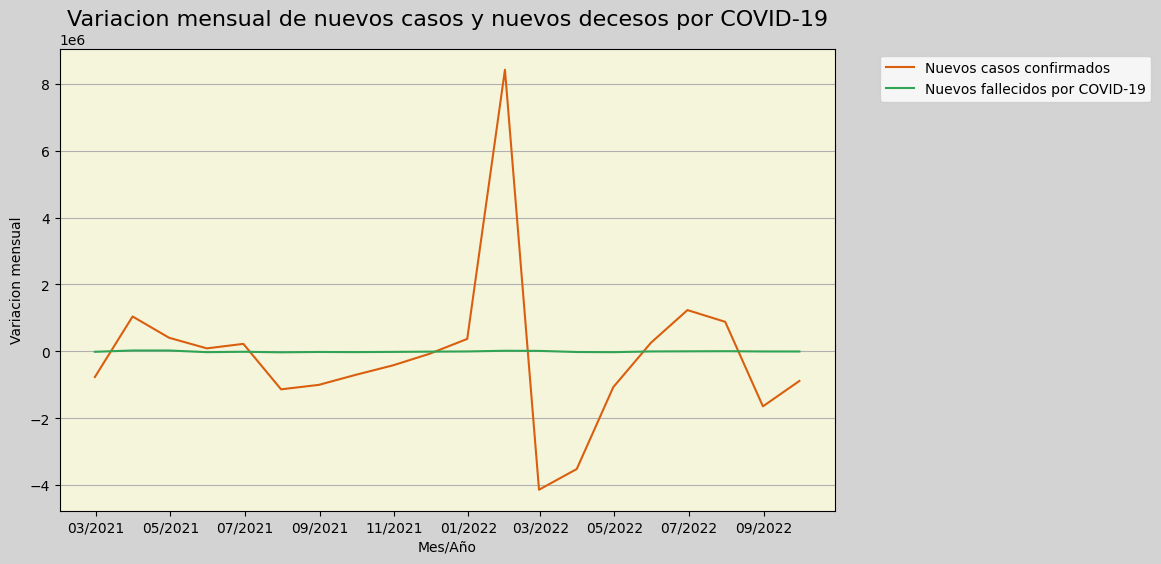

In [123]:
#Calculamos la suma de nuevos confirmados y nuevos decesos, y aplicamos resample para obtener la suma mensual de las columnas
nuevos_casos_por_mes = data_latinoamerica_nuevo['new_confirmed'].resample('ME').sum()
nuevos_fallecidos_por_mes = data_latinoamerica_nuevo['new_deceased'].resample('ME').sum()

#Calculamos la variación o diferencia mensual restando la suma del mes anterior a la suma del mes actual
variacion_nuevos_casos = nuevos_casos_por_mes.diff()
variacion_nuevos_fallecidos = nuevos_fallecidos_por_mes.diff()

#Creamos el gráfico de lineas y definimos su tamaño
plt.figure(figsize=(10,6))  

#Vamos a formatear el eje x para mostrar MM/AAAA para una mejor visualización
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

# Creamos el gráfico de lineas, las columnas para los ejes x e y, hue para cada country_name, y nuestra paleta de colores)
sns.lineplot(x=variacion_nuevos_casos.index, y=variacion_nuevos_casos.values, label='Nuevos casos confirmados', color='#d95f0e')
sns.lineplot(x=variacion_nuevos_fallecidos.index, y=variacion_nuevos_fallecidos.values,label='Nuevos fallecidos por COVID-19', color='#31a354')
plt.gca().set_facecolor('beige')                                        # Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                                    #Fondo alrededor del gráfico
plt.grid(axis='y')                                                      #Lineas cuadriculas en el eje y

#Personalizamos nuestro grafico
plt.title('Variacion mensual de nuevos casos y nuevos decesos por COVID-19', fontsize=16)
plt.xlabel('Mes/Año')                                          #Titulo eje x
plt.ylabel('Variacion mensual')                                #Titulo eje y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')       #Personalizamos la leyenda

# Mostramos el gráfico
plt.show()

#Recordar que no teniamos datos de todos los paises, entonces se hizo tratamiento con valores medios y 0 

•	Análisis Temporal de la Mortalidad/

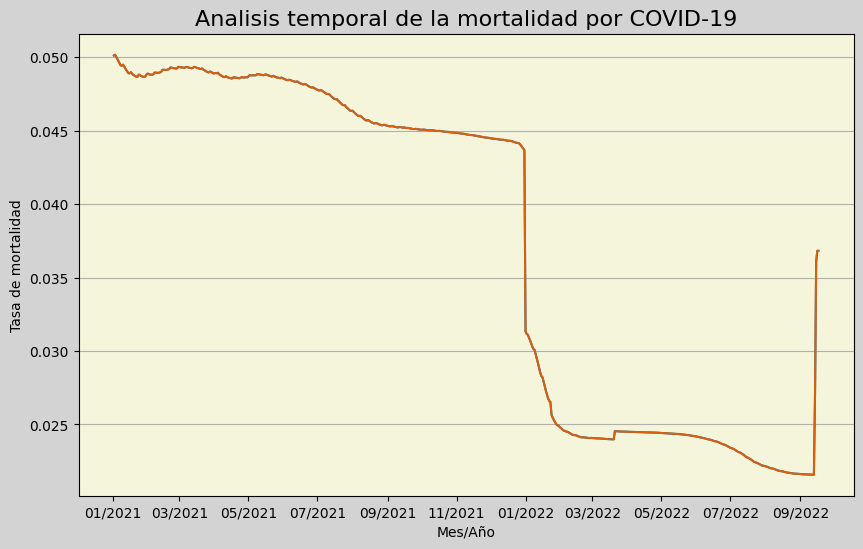

In [126]:
#Calculamos la tasa de mortalidad, es decir el cociente entre el número acumulado de fallecidos y el número acumulado de confirmados por COVID-19
data_latinoamerica_nuevo['mortality_rate'] = data_latinoamerica_nuevo['cumulative_deceased'] / data_latinoamerica_nuevo['cumulative_confirmed']

#Creamos el gráfico de lineas y definimos su tamaño
plt.figure(figsize=(10,6))  

#Vamos a formatear el eje x para mostrar MM/AAAA para una mejor visualización
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

sns.lineplot(data=data_latinoamerica_nuevo, x='date', y='mortality_rate', estimator='mean', errorbar=None)


# Creamos el gráfico, las columnas para los ejes x (date) e y(tasa de mortalidad), utilizando el valor medio como estimador y sin intervalo de confianza (ci=None)
sns.lineplot(data=data_latinoamerica_nuevo, x='date', y='mortality_rate', estimator='mean', errorbar=None,color='#d95f0e')
plt.gca().set_facecolor('beige')                                        # Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                                    #Fondo alrededor del gráfico
plt.grid(axis='y')                                                      #Lineas cuadriculas en el eje y

#Personalizamos nuestro grafico
plt.title('Analisis temporal de la mortalidad por COVID-19', fontsize=16)
plt.xlabel('Mes/Año')                                          #Titulo eje x
plt.ylabel('Tasa de mortalidad')                                #Titulo eje y

# Mostramos el gráfico
plt.show()


•	Comparación de la Situación Actual (Contexto de los datos)

<Figure size 1000x600 with 0 Axes>

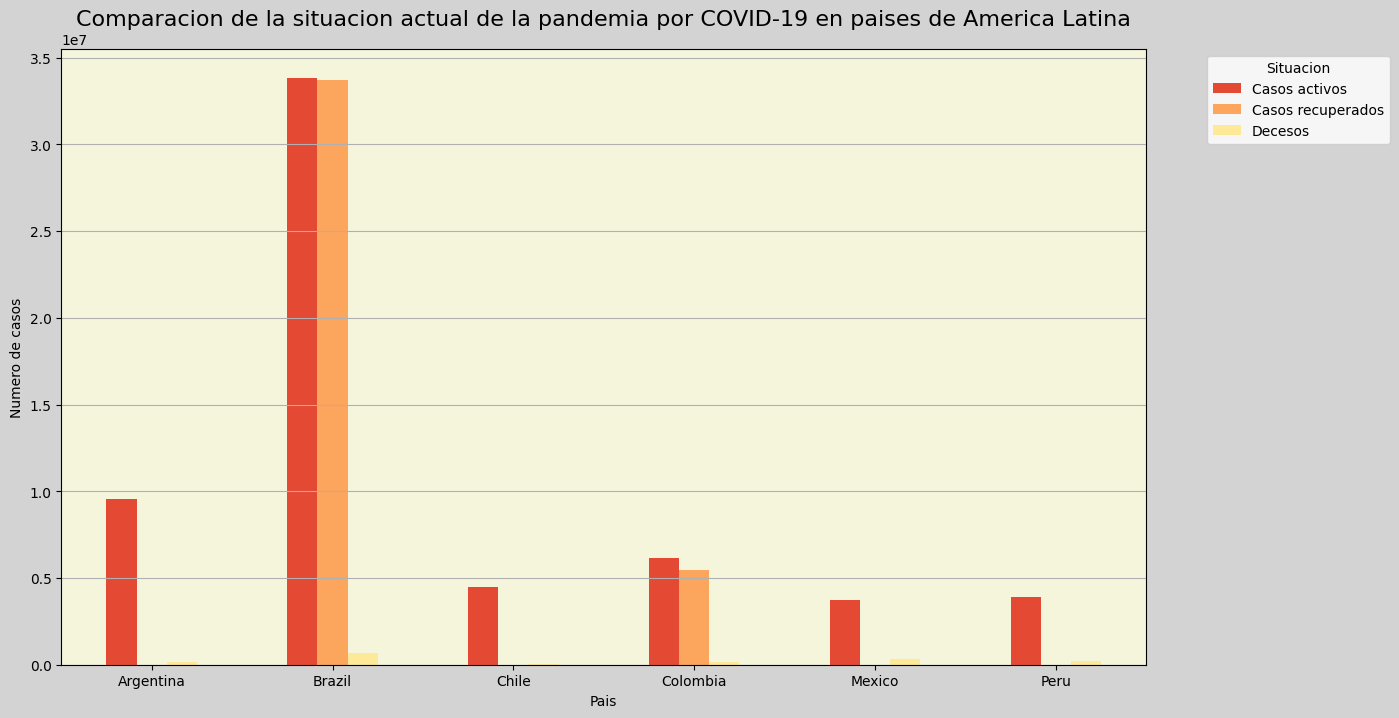

In [135]:
#Considerar que para algunos paises del estudio no tenemos los datos de los recuperados ni los decesos

#Agrupamos los datos por pais (con groupby) y calculamos el máximo para las columnas de 'casos_activos', 'cumulative_recovered' y 'cumulative_deceased'
situacion_actual = data_latinoamerica_nuevo.groupby('country_name').max()[['casos_activos', 'cumulative_recovered', 'cumulative_deceased']]

#Creamos el gráfico de lineas y definimos su tamaño
plt.figure(figsize=(10,6))  

# Definimos una paleta de colores 
palette = sns.color_palette('RdYlGn')

# Creamos el gráfico de barras no apiladas
situacion_actual.plot(kind='bar', stacked=False, figsize=(14, 8), color=palette)
plt.gca().set_facecolor('beige')                                        # Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                                    #Fondo alrededor del gráfico
plt.grid(axis='y')                                                      #Lineas cuadriculas en el eje y

#Personalizamos nuestro grafico
plt.title('Comparacion de la situacion actual de la pandemia por COVID-19 en paises de America Latina', fontsize=16)
plt.xlabel('Pais')                                          #Titulo eje x
plt.ylabel('Numero de casos')                                #Titulo eje y
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Situacion', labels=['Casos activos', 'Casos recuperados', 'Decesos'])  #Personalizamos la leyenda para cada barra

# Mostramos el gráfico
plt.show()

Extra-credit: visualización a través de mapa: nos permite obtener una mejor visualizacion del impacto de la pandemia del COVID-19 en los paises bajo estudio

In [143]:
#Seleccionamos las columnas que vamos a utilizar para graficar
columnas_mapa=['latitude', 'longitude', 'cumulative_confirmed','cumulative_deceased','cumulative_vaccine_doses_administered','cumulative_recovered']
data_map= data_latinoamerica_paises[columnas_mapa].dropna()         #En esta instancia, eliminamos las filas que contienen valores faltantes, en cualquier columna

#Creamos un mapa centrado en América Latina, definiendo el zoom de inicio
map= folium.Map(location=[-14.235004,-51.92527], zoom_start=4)

#Creamos un mapa de calor para los casos confirmados
heat_map_confirmed= HeatMap(data=data_map[['latitude','longitude','cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

#Creamos un mapa de calor para las muertes
heat_map_deceased= HeatMap(data=data_map[['latitude','longitude','cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

#Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine= HeatMap(data=data_map[['latitude','longitude','cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

#Creamos un mapa de calor para los recuperados
heat_map_recovered= HeatMap(data=data_map[['latitude','longitude','cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map

#Brazil y Mexico son los paises que tienen mayor cantidad de datos